In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('combined.csv')

In [3]:
data.head()

Unnamed: 0  Index  Class SubClass        v1        v2          T      T*  \
0           0      1   -0.5      A.1  0.286924  0.079185   4.176129   4.538   
1           1      2   -0.5      A.1  0.342031  0.180937  13.915334   9.063   
2           2      3   -0.5      A.1  0.369772  0.191007  25.944195  13.095   
3           3      4   -0.5      A.1  0.200966  0.243108  19.013416  19.086   
4           4      5   -0.5      A.1  0.261324  0.235624  28.435858  23.513   

   Lf Stability        mi                 Slova  
0   4         U  0.315879                  BabA  
1   8         U   1.97222              BaBabAbA  
2  12         U  2.314004          BaBaBabAbAbA  
3  16         U  6.927685      BaBAbaBabAbaBAbA  
4  20         U  1.109487  BaBAbAbaBabAbaBaBAbA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1317 non-null   int64  
 1   Index       1317 non-null   int64  
 2   Class       1317 non-null   float64
 3   SubClass    1317 non-null   object 
 4   v1          1317 non-null   float64
 5   v2          1317 non-null   float64
 6   T           1317 non-null   float64
 7   T*          1317 non-null   float64
 8   Lf          1317 non-null   int64  
 9   Stability   1317 non-null   object 
 10  mi          1317 non-null   object 
 11  Slova       1317 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 123.6+ KB


## Broj ponavljanja odredjenih slova (a,b,A,B)

In [5]:
def count_letters(df):
    
    df['a'] = df['Slova'].count('a')
    df['b'] = df['Slova'].count('b')
    df['A'] = df['Slova'].count('A')
    df['B'] = df['Slova'].count('B')
    return df

data = data.apply(count_letters, axis=1)

In [6]:
data

Unnamed: 0  Index  Class SubClass        v1        v2          T  \
0              0      1   -0.5      A.1  0.286924  0.079185   4.176129   
1              1      2   -0.5      A.1  0.342031  0.180937  13.915334   
2              2      3   -0.5      A.1  0.369772  0.191007  25.944195   
3              3      4   -0.5      A.1  0.200966  0.243108  19.013416   
4              4      5   -0.5      A.1  0.261324  0.235624  28.435858   
...          ...    ...    ...      ...       ...       ...        ...   
1312        1357      1  -10.0      G.2  0.956588  0.849097  24.256801   
1313        1358      1  -10.0      G.2  0.998615  0.593517  47.936051   
1314        1359      1  -10.0      G.3  0.963922  0.974436  48.131620   
1315        1360      2  -10.0      G.3  0.925484  0.951730  49.868521   
1316        1361      3  -10.0      G.3  0.963741  0.482009  95.618510   

            T*   Lf Stability        mi  \
0        4.538    4         U  0.315879   
1        9.063    8         U   1.97222   
2       13.095   12         U  2.314004   
3       19.086   16         U  6.927685   
4       23.513   20         U  1.109487   
...        ...  ...       ...       ...   
1312  1935.907   64         U  3.577508   
1313  3932.658  130         U  2.119012   
1314  3751.177  124         U  7.666035   
1315  3931.244  130         U  1.824135   
1316  7985.803  264         U  0.379908   

                                                  Slova   a   b   A   B  
0                                                  BabA   1   1   1   1  
1                                              BaBabAbA   2   2   2   2  
2                                          BaBaBabAbAbA   3   3   3   3  
3                                      BaBAbaBabAbaBAbA   4   4   4   4  
4                                  BaBAbAbaBabAbaBaBAbA   5   5   5   5  
...                                                 ...  ..  ..  ..  ..  
1312  BABABABABABABABAbababababababababababababababa...  16  16  16  16  
1313  BABABABABABABABAbababababababababababababababa...  33  33  32  32  
1314  BABABABABABABABAbababababababababababababababa...  31  31  31  31  
1315  BABABABABABABABAbababababababababababababababa...  32  32  33  33  
1316  BABABABABABABABABababababababababababababababa...  66  66  66  66  

[1317 rows x 16 columns]

In [7]:
data['Class']

0       -0.5
1       -0.5
2       -0.5
3       -0.5
4       -0.5
        ... 
1312   -10.0
1313   -10.0
1314   -10.0
1315   -10.0
1316   -10.0
Name: Class, Length: 1317, dtype: float64

In [8]:
print(data[data['Class']==-0.5]['a'].sum())
print(data[data['Class']==-0.5]['b'].sum())
print(data[data['Class']==-0.5]['A'].sum())
print(data[data['Class']==-0.5]['B'].sum())

15518
15518
15577
15577


In [9]:
df = data.copy()

df['Diff'] = np.where( (abs((df['a']+df['b']) - (df['A'] + df['B']))>0), '1', '0')

df

Unnamed: 0  Index  Class SubClass        v1        v2          T  \
0              0      1   -0.5      A.1  0.286924  0.079185   4.176129   
1              1      2   -0.5      A.1  0.342031  0.180937  13.915334   
2              2      3   -0.5      A.1  0.369772  0.191007  25.944195   
3              3      4   -0.5      A.1  0.200966  0.243108  19.013416   
4              4      5   -0.5      A.1  0.261324  0.235624  28.435858   
...          ...    ...    ...      ...       ...       ...        ...   
1312        1357      1  -10.0      G.2  0.956588  0.849097  24.256801   
1313        1358      1  -10.0      G.2  0.998615  0.593517  47.936051   
1314        1359      1  -10.0      G.3  0.963922  0.974436  48.131620   
1315        1360      2  -10.0      G.3  0.925484  0.951730  49.868521   
1316        1361      3  -10.0      G.3  0.963741  0.482009  95.618510   

            T*   Lf Stability        mi  \
0        4.538    4         U  0.315879   
1        9.063    8         U   1.97222   
2       13.095   12         U  2.314004   
3       19.086   16         U  6.927685   
4       23.513   20         U  1.109487   
...        ...  ...       ...       ...   
1312  1935.907   64         U  3.577508   
1313  3932.658  130         U  2.119012   
1314  3751.177  124         U  7.666035   
1315  3931.244  130         U  1.824135   
1316  7985.803  264         U  0.379908   

                                                  Slova   a   b   A   B Diff  
0                                                  BabA   1   1   1   1    0  
1                                              BaBabAbA   2   2   2   2    0  
2                                          BaBaBabAbAbA   3   3   3   3    0  
3                                      BaBAbaBabAbaBAbA   4   4   4   4    0  
4                                  BaBAbAbaBabAbaBaBAbA   5   5   5   5    0  
...                                                 ...  ..  ..  ..  ..  ...  
1312  BABABABABABABABAbababababababababababababababa...  16  16  16  16    0  
1313  BABABABABABABABAbababababababababababababababa...  33  33  32  32    1  
1314  BABABABABABABABAbababababababababababababababa...  31  31  31  31    0  
1315  BABABABABABABABAbababababababababababababababa...  32  32  33  33    1  
1316  BABABABABABABABABababababababababababababababa...  66  66  66  66    0  

[1317 rows x 17 columns]

In [10]:
df[df['Class']==-0.5]['Diff'].value_counts()

1    358
0    207
Name: Diff, dtype: int64

In [11]:
df[df['Diff'] == "1"].count()

Unnamed: 0    744
Index         744
Class         744
SubClass      744
v1            744
v2            744
T             744
T*            744
Lf            744
Stability     744
mi            744
Slova         744
a             744
b             744
A             744
B             744
Diff          744
dtype: int64

Text(0, 0.5, 'Diff')

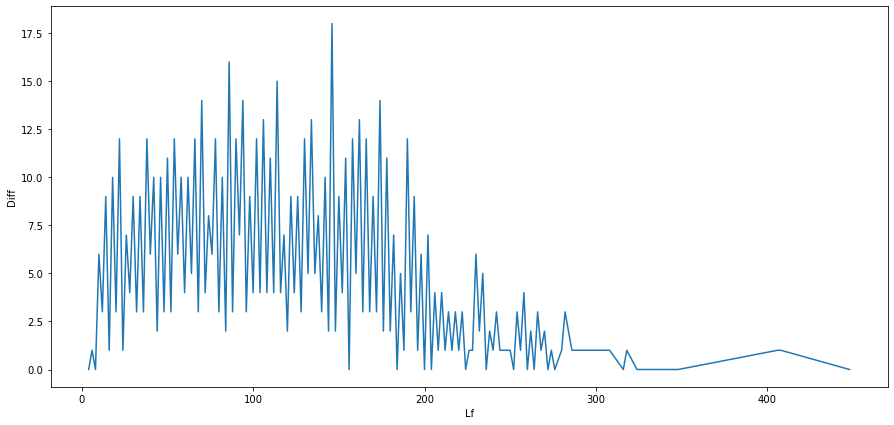

In [12]:
N_ukupno = []
#N_lf = data[data['Class']=='10']['Lf'].unique()
for i in df['Lf'].unique():
    
    N_ukupno.append(df[(df['Lf']==i) & (df['Diff']=="1")]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=df['Lf'].unique(), y=N_ukupno)
#plt.title('Broj U, M, S orbita, mase 10, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('Diff')

In [13]:
df.to_csv('diff.csv')

In [14]:
data = df

In [15]:
print(data['a'].sum())
print(data['b'].sum())
print(data['A'].sum())
print(data['B'].sum())

39083
39081
39330
39331


## Klase

In [16]:
data['Class'].value_counts()

-0.50     565
-0.75     373
-2.00     233
-4.00      85
-5.00      35
-8.00      17
-10.00      9
Name: Class, dtype: int64

In [17]:
diC = {-0.50: "0.5", -0.75: "0.75", -2.00: "2", -4.00: "4", -5.00:"5", -8.0: "8", -10.00: "10"}
data = data.replace({"Class": diC})



## Grafici

Text(0.5, 1.0, 'T u zavisnosti od dužine reči')

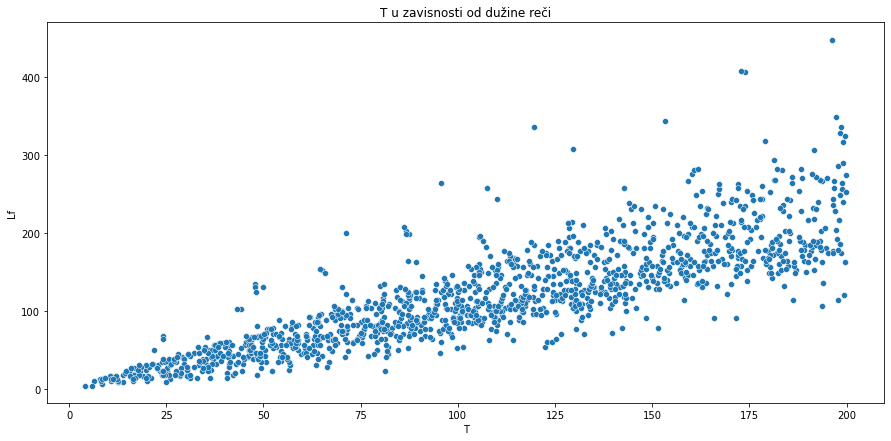

In [18]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = data)
plt.title('T u zavisnosti od dužine reči')

### Masa 0.5

Text(0.5, 1.0, 'T u zavisnosti od dužine reči (Masa 0.5)')

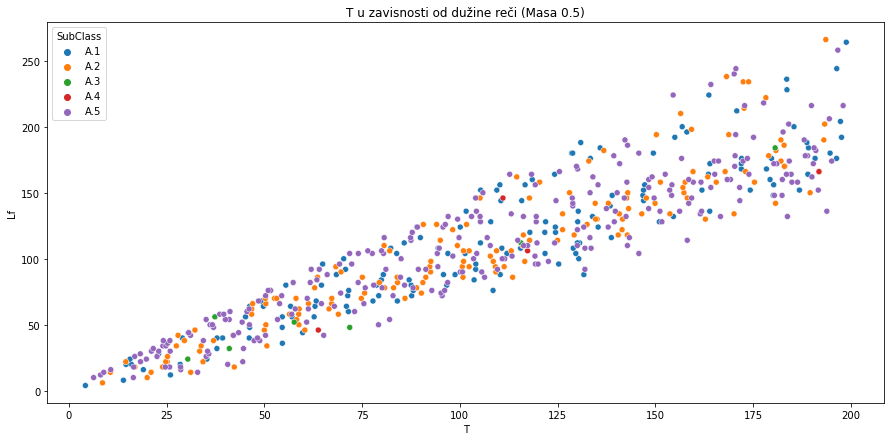

In [19]:
a = data[data['Class']=='0.5']
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = a, hue='SubClass')
plt.title('T u zavisnosti od dužine reči (Masa 0.5)')

### Masa 0.75

Text(0.5, 1.0, 'T u zavisnosti od dužine reči (Masa 0.75)')

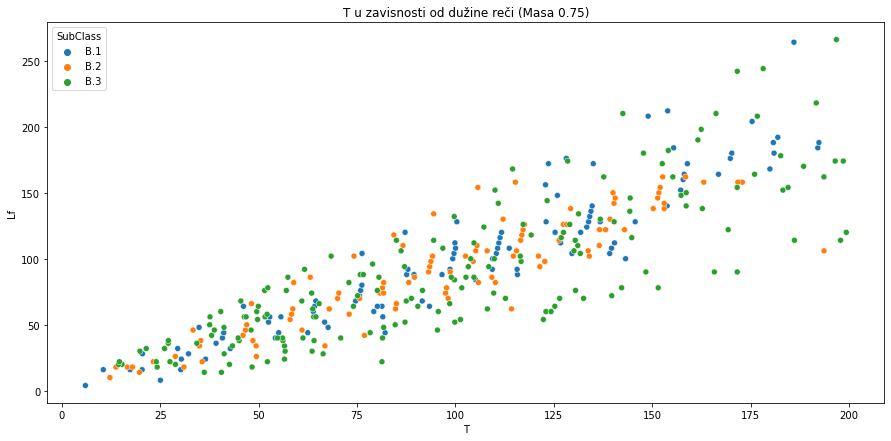

In [20]:
b = data[data['Class']=='0.75']
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = b, hue='SubClass')
plt.title('T u zavisnosti od dužine reči (Masa 0.75)')

### Masa 2

Text(0.5, 1.0, 'T u zavisnosti od dužine reči (Masa 2)')

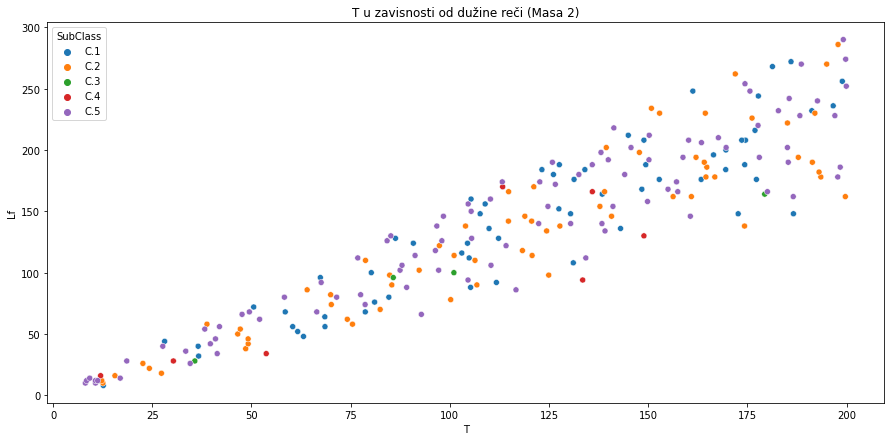

In [21]:
c = data[data['Class']=='2']
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = c, hue='SubClass')
plt.title('T u zavisnosti od dužine reči (Masa 2)')

### Masa 4

Text(0.5, 1.0, 'T u zavisnosti od dužine reči (Masa 4)')

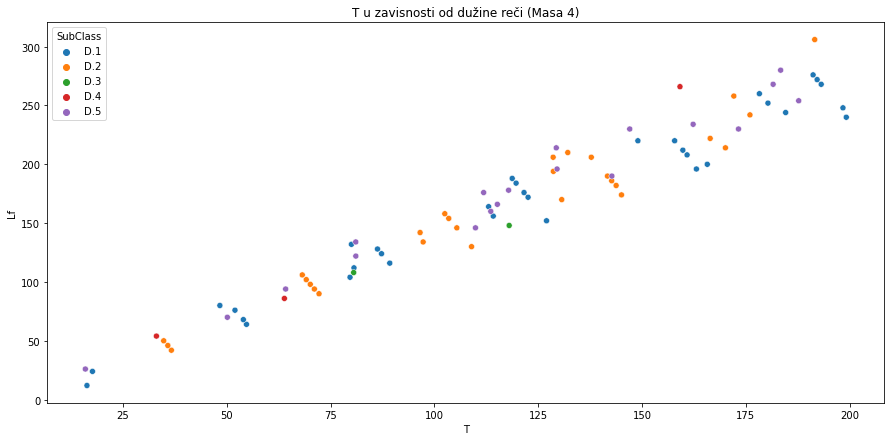

In [22]:
d = data[(data['Class']=='4')]
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = d, hue = 'SubClass')
plt.title('T u zavisnosti od dužine reči (Masa 4)')

### Masa 5

Text(0.5, 1.0, 'T u zavisnosti od dužine reči (Masa 5)')

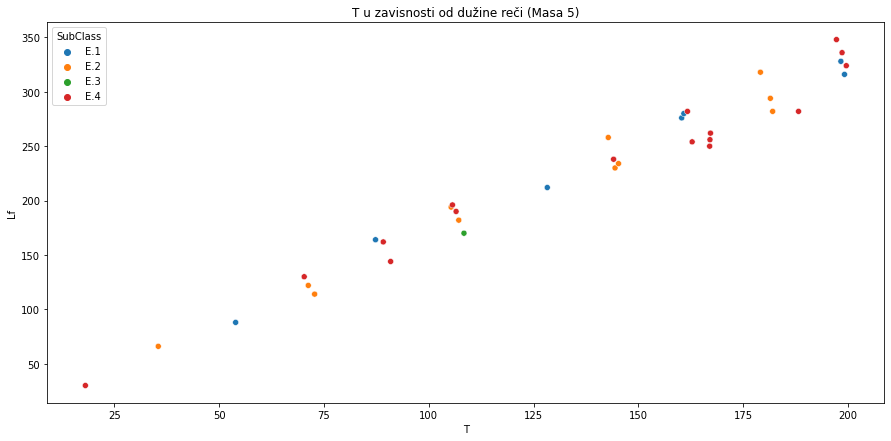

In [23]:
e = data[data['Class']=='5']
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = e, hue='SubClass')
plt.title('T u zavisnosti od dužine reči (Masa 5)')

### Masa 8

Text(0.5, 1.0, 'T u zavisnosti od dužine reči (Masa 8)')

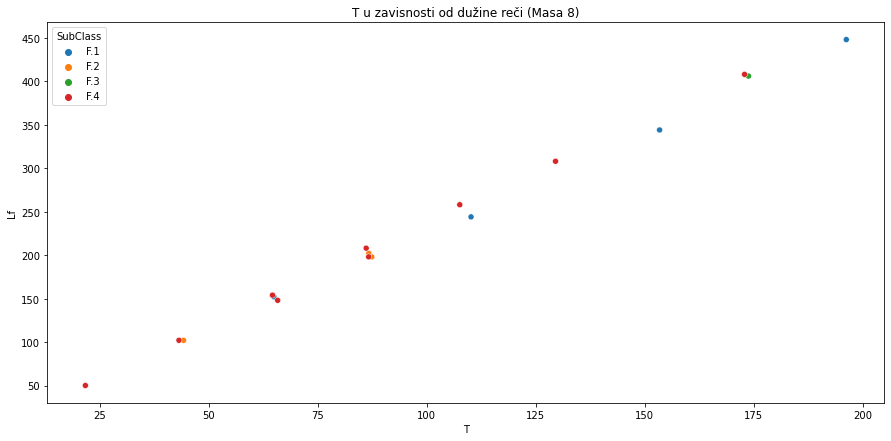

In [24]:
e = data[data['Class']=='8']
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = e, hue='SubClass')
plt.title('T u zavisnosti od dužine reči (Masa 8)')

### Masa 10

Text(0.5, 1.0, 'T u zavisnosti od dužine reči (Masa 10)')

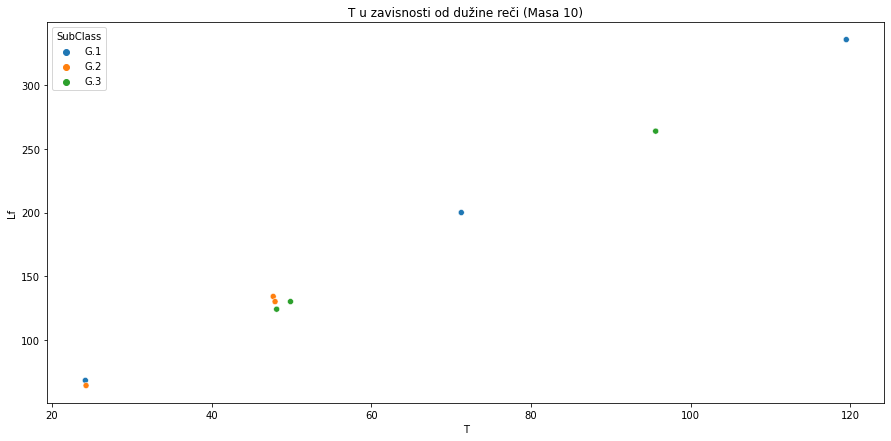

In [25]:
f = data[data['Class']=='10']
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = f, hue='SubClass')
plt.title('T u zavisnosti od dužine reči (Masa 10)')

# Mase i Diff


In [26]:
data['Razlika'] = abs((data['a']+data['b']) - (data['A']+data['B']))

In [27]:
data['Razlika'].unique()

array([ 0,  2,  6, 10, 14, 22,  4,  8, 16, 12, 20, 18, 24, 28, 30, 26,  1],
      dtype=int64)

Text(0.5, 1.0, 'v2 u zavisnosti od T, marginalna stabilnost i "razlika" je 0')

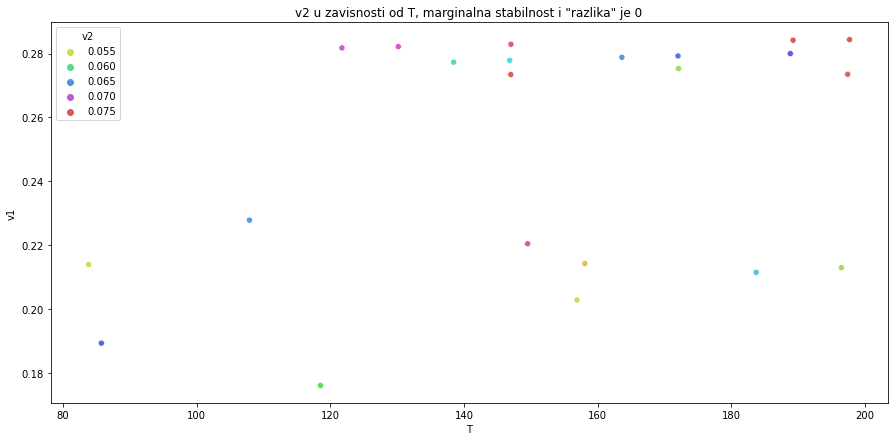

In [28]:
c = data[(data['Class']=='0.5') & (data['Stability']=='M') & (data['Razlika']==0)& (data['SubClass']=='A.1')& (data['Lf']>100)& (data['v2']>0.050)& (data['v2']<0.08)]
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'v1', data = c, hue='v2', palette='hls')
plt.title('v2 u zavisnosti od T, marginalna stabilnost i "razlika" je 0')

In [29]:
c

Unnamed: 0  Index Class SubClass        v1        v2           T  \
67           67     68   0.5      A.1  0.213841  0.054294   83.847291   
74           74     75   0.5      A.1  0.189231  0.066264   85.755768   
82           82     83   0.5      A.1  0.281781  0.070743  121.742895   
88           88     89   0.5      A.1  0.282197  0.071511  130.165100   
89           89     90   0.5      A.1  0.227788  0.064662  107.908401   
96           96     97   0.5      A.1  0.277300  0.061243  138.456899   
98           98     99   0.5      A.1  0.282906  0.072779  147.022329   
102         102    103   0.5      A.1  0.277862  0.062577  146.840299   
108         108    109   0.5      A.1  0.273434  0.050441  147.000140   
113         113    114   0.5      A.1  0.175957  0.058287  118.524272   
116         116    117   0.5      A.1  0.278831  0.064774  163.618424   
121         121    122   0.5      A.1  0.279252  0.065690  172.012763   
126         126    127   0.5      A.1  0.275325  0.056118  172.090298   
130         130    131   0.5      A.1  0.220392  0.072068  149.514737   
132         132    133   0.5      A.1  0.284188  0.074961  189.222584   
133         133    134   0.5      A.1  0.279996  0.067252  188.811208   
135         135    136   0.5      A.1  0.284386  0.075285  197.669286   
137         137    138   0.5      A.1  0.214190  0.053486  158.085654   
139         139    140   0.5      A.1  0.202759  0.054798  156.893368   
140         140    141   0.5      A.1  0.273524  0.050732  197.393177   
143         143    144   0.5      A.1  0.211430  0.063352  183.704913   
145         145    146   0.5      A.1  0.212898  0.056044  196.451955   

          T*   Lf Stability        mi  \
67   118.112  104         M  0.001088   
74   126.964  112         M  0.005413   
82   136.256  120         M  0.001143   
88   145.334  128         M  0.001356   
89   145.349  128         M  0.025579   
96   159.033  140         M  0.000981   
98   163.488  144         M  0.001363   
102  168.113  148         M  0.000947   
108  172.712  152         M  0.001627   
113  181.429  160         M  0.012704   
116  186.271  164         M  0.002639   
121  195.350  172         M  0.001598   
126  199.958  176         M  0.001111   
130  204.249  180         M  0.002103   
132  208.874  184         M  0.002305   
133  213.506  188         M  0.001971   
135  217.951  192         M  0.002422   
137  222.606  196         M  0.001462   
139  227.054  200         M  0.001332   
140  231.797  204         M  0.000983   
143  258.716  228         M  0.004792   
145  277.080  244         M  0.002292   

                                                 Slova   a   b   A   B Diff  \
67   BabABabaBabABAbABAbaBabaBAbaBABaBAbabAbabABaBA...  26  26  26  26    0   
74   BAbAbabABaBABabAbaBABaBAbabAbABAbaBabaBAbABaba...  28  28  28  28    0   
82   BabABabABabABabaBAbaBAbaBAbaBAbaBAbaBAbaBAbaBA...  30  30  30  30    0   
88   BabABabABabABabABAbaBAbaBAbaBAbaBAbaBAbaBAbaBA...  32  32  32  32    0   
89   BabABabaBabABAbABAbaBabaBAbABAbaBAbabAbaBABaBA...  32  32  32  32    0   
96   BabABabABAbaBAbaBAbaBAbaBABabABabABabABabABaba...  35  35  35  35    0   
98   BabABabABabABabABabaBAbaBAbaBAbaBAbaBAbaBAbaBA...  36  36  36  36    0   
102  BabABabABAbaBAbaBAbaBAbaBAbabABabABabABabABabA...  37  37  37  37    0   
108  BabABabaBAbaBAbaBAbabABabABabABabaBAbaBAbaBABa...  38  38  38  38    0   
113  BAbAbabABaBABabAbabABaBAbabAbaBABaBAbabAbABAba...  40  40  40  40    0   
116  BabABabABabaBAbaBAbaBAbaBAbaBAbabABabABabABabA...  41  41  41  41    0   
121  BabABabABabaBAbaBAbaBAbaBAbaBAbabABabABabABabA...  43  43  43  43    0   
126  BabABabaBAbaBAbaBAbaBABabABabABabABabaBAbaBAba...  44  44  44  44    0   
130  BabABabABabABAbABabaBaBABAbAbabABabABabABabABa...  45  45  45  45    0   
132  BabABabABabABabABabABabaBAbaBAbaBAbaBAbaBAbaBA...  46  46  46  46    0   
133  BabABabABabABAbaBAbaBAbaBAbaBAbaBAbabABabABabA...  47  47  47  47    0   
135  BabABabABabABabABabABabABAbaBAbaB

### Zavisnost T i T*

Text(0.5, 1.0, 'T u zavisnosti od T* raspoređeno po klasama')

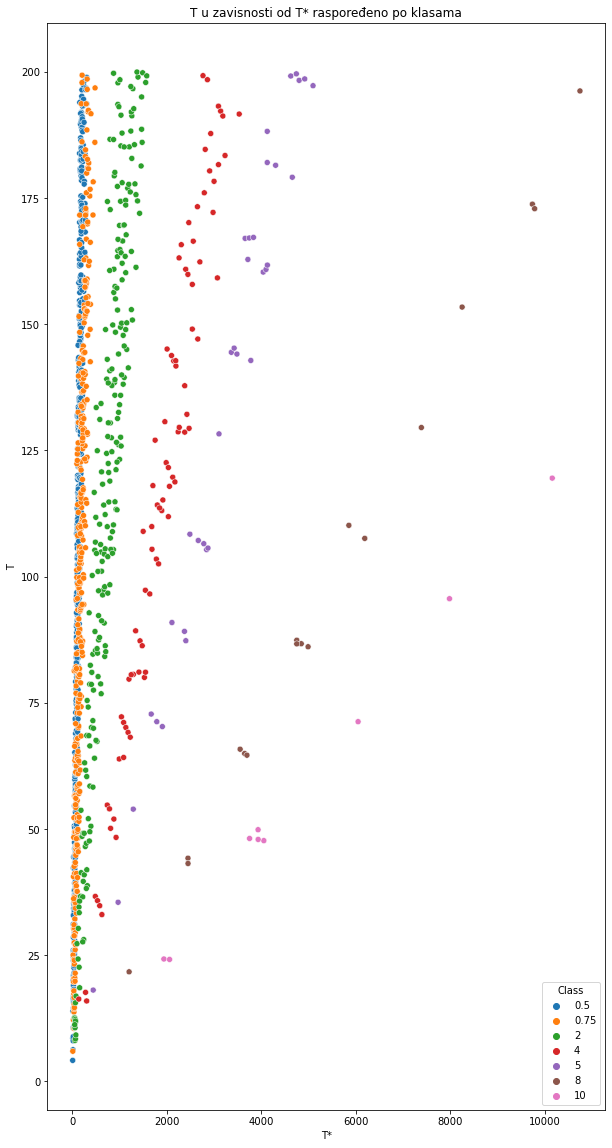

In [30]:
plt.figure(figsize=(10,20))
sns.scatterplot(x = 'T*', y = 'T', data = data, hue='Class')
plt.title('T u zavisnosti od T* raspoređeno po klasama')

Text(0.5, 1.0, 'T* u zavisnosti od dužine reči raspoređeno po klasama')

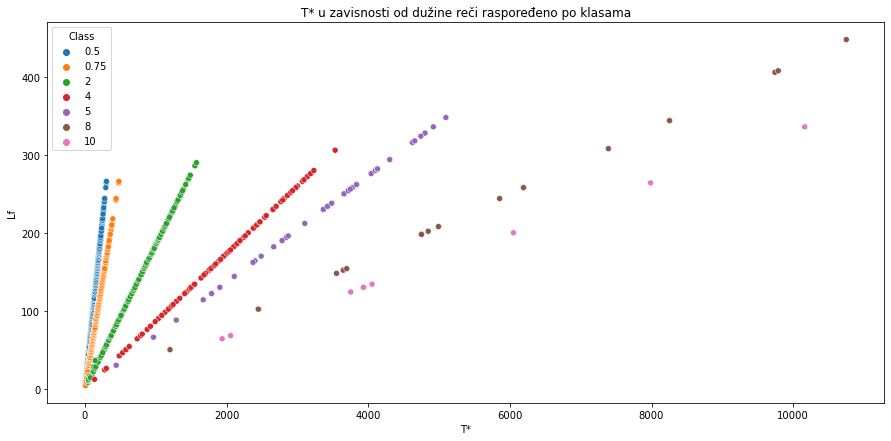

In [31]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T*', y = 'Lf', data = data, hue='Class')
plt.title('T* u zavisnosti od dužine reči raspoređeno po klasama')

### Zavisnost duzine reci i v1

Text(0.5, 1.0, 'v1 u zavisnosti od dužine reči')

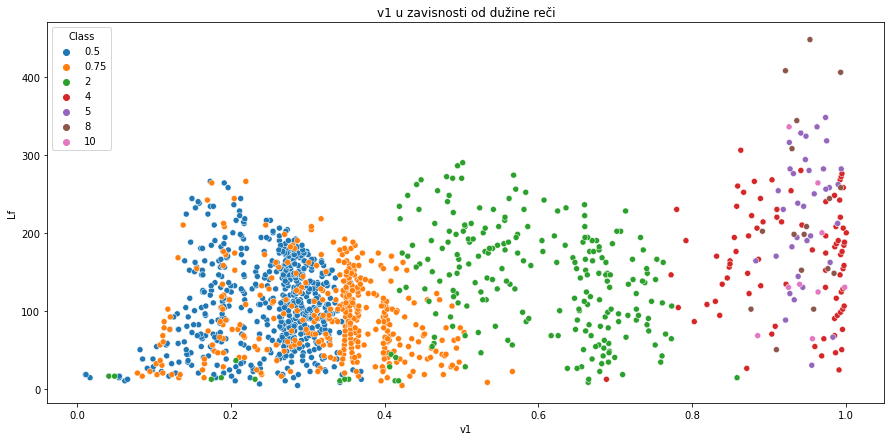

In [32]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'Lf', data = data, hue='Class')
plt.title('v1 u zavisnosti od dužine reči')

### Zavisnost duzine reci i v2

Text(0.5, 1.0, 'v2 u zavisnosti od dužine reči')

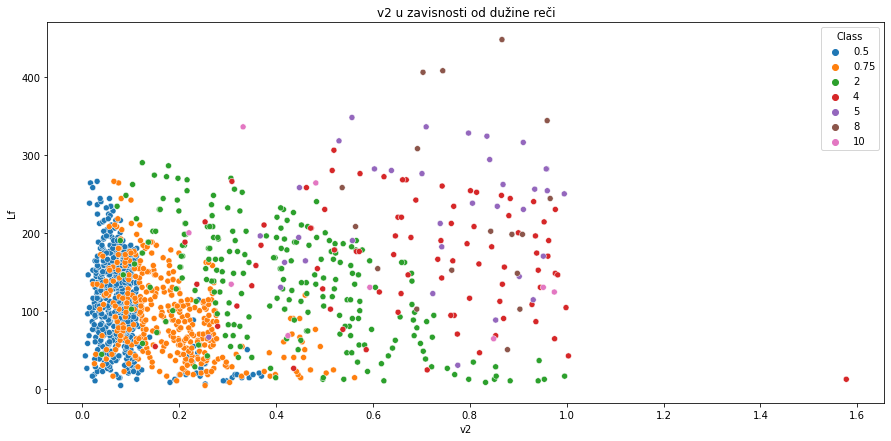

In [33]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v2', y = 'Lf', data = data, hue='Class')
plt.title('v2 u zavisnosti od dužine reči')

### Zavisnost v1 i T

Text(0.5, 1.0, 'v1 u zavisnosti od v2')

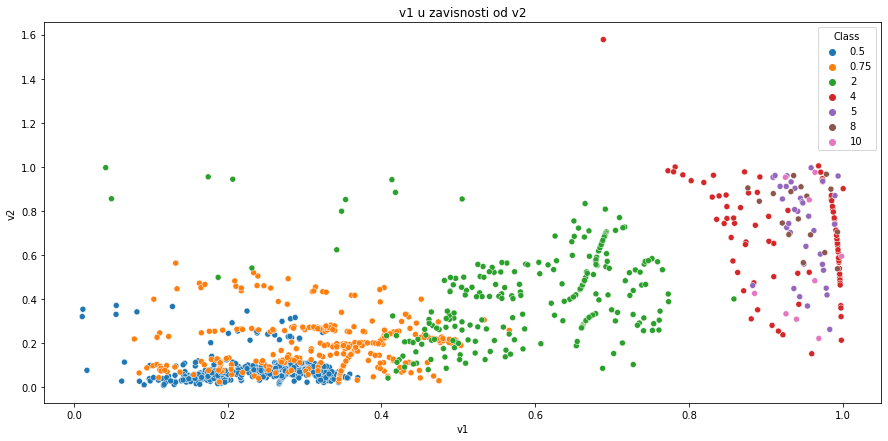

In [34]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data, hue='Class')
plt.title('v1 u zavisnosti od v2')

<AxesSubplot:xlabel='v1', ylabel='v2'>

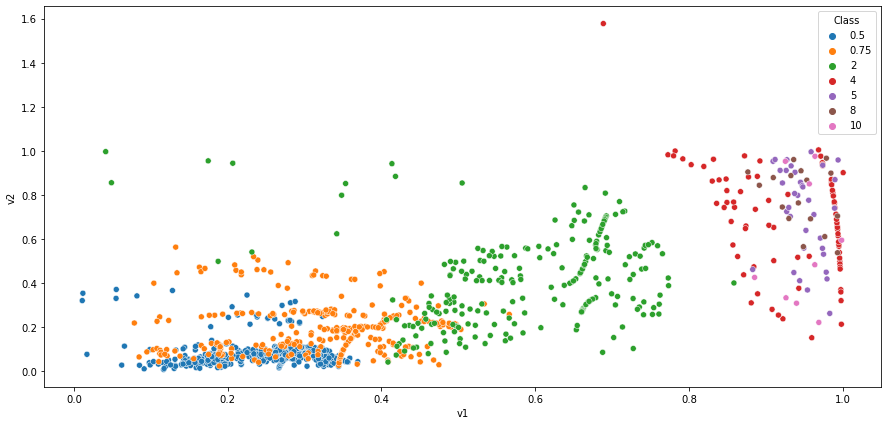

In [35]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data, hue='Class')

<Figure size 1080x1080 with 0 Axes>

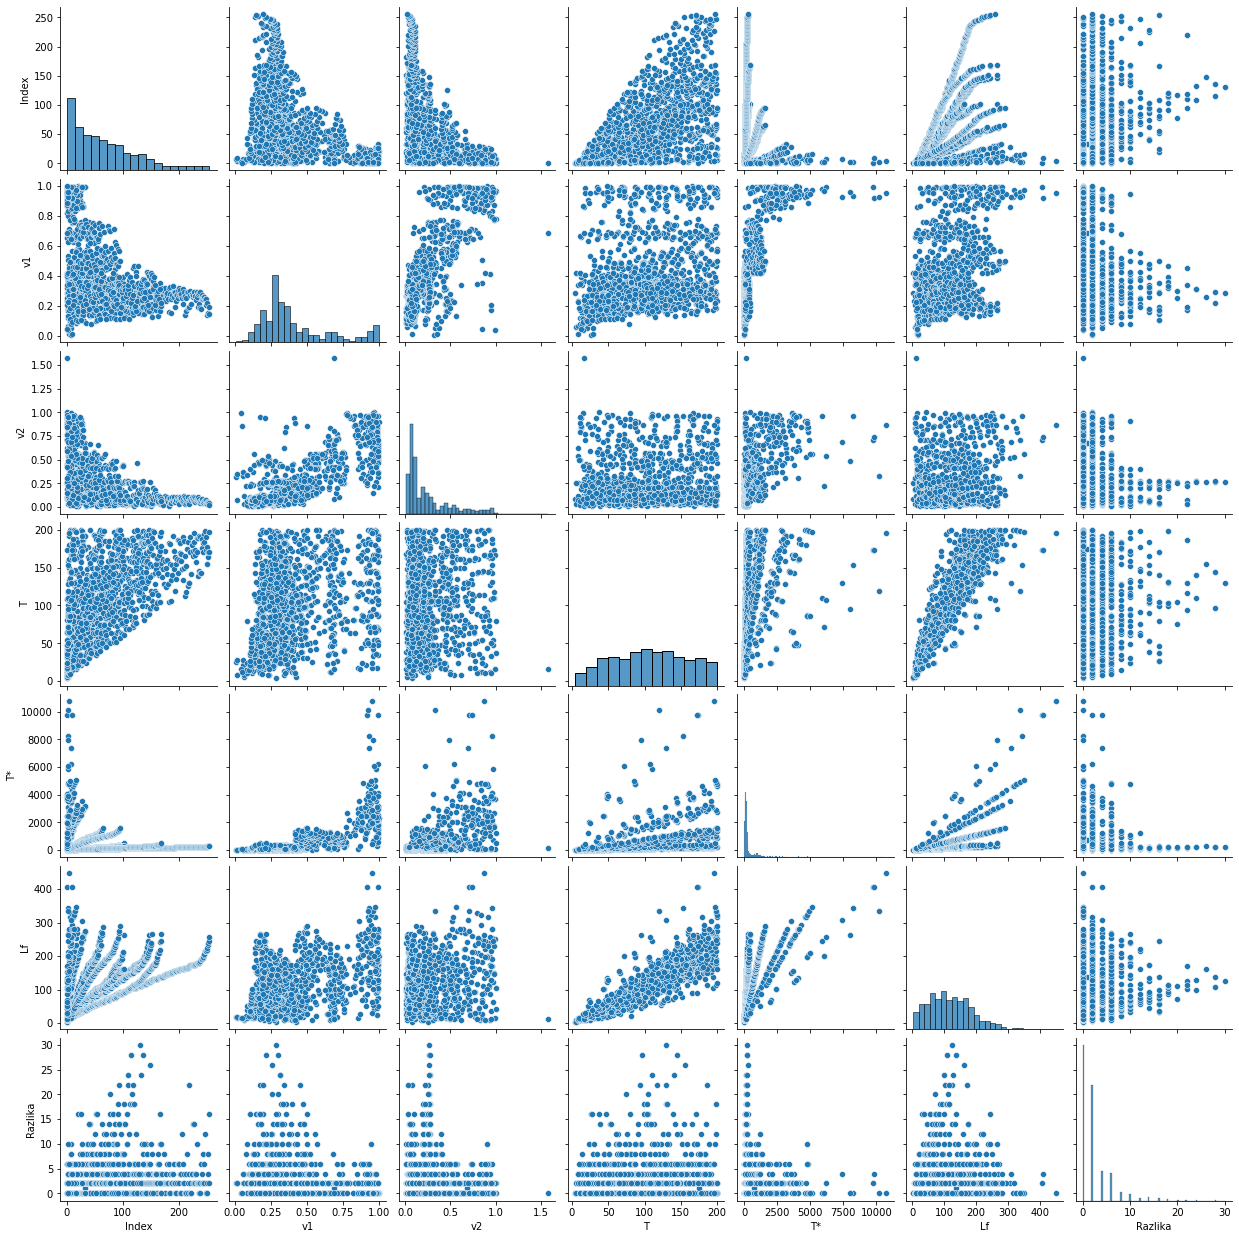

In [36]:
plt.figure(figsize=(15,15))
sns.pairplot(data.drop(columns=['a','b','A','B','Unnamed: 0']))

<AxesSubplot:>

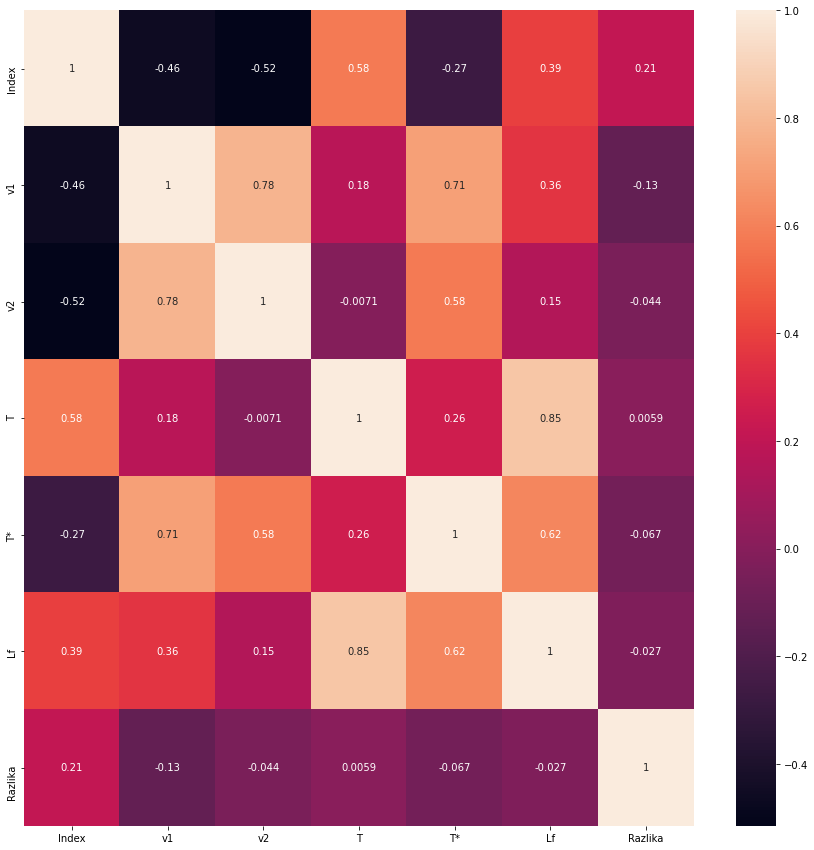

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(data.drop(columns=['a','b','A','B','Unnamed: 0']).corr(), annot=True)

In [38]:
data[data['Stability']=='M'].count()


Unnamed: 0    529
Index         529
Class         529
SubClass      529
v1            529
v2            529
T             529
T*            529
Lf            529
Stability     529
mi            529
Slova         529
a             529
b             529
A             529
B             529
Diff          529
Razlika       529
dtype: int64

Text(0.5, 1.0, 'T* u zavisnosti od dužine reči raspoređeno po klasama')

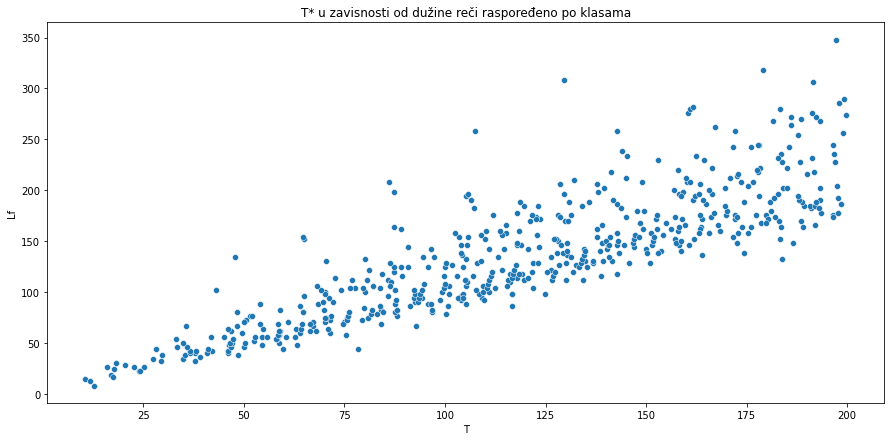

In [39]:
data_m = data[data['Stability']=='M']
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T', y = 'Lf', data = data_m)
plt.title('T* u zavisnosti od dužine reči raspoređeno po klasama')

## Orbite u zavisnosti od Lf

Text(0.5, 1.0, '')

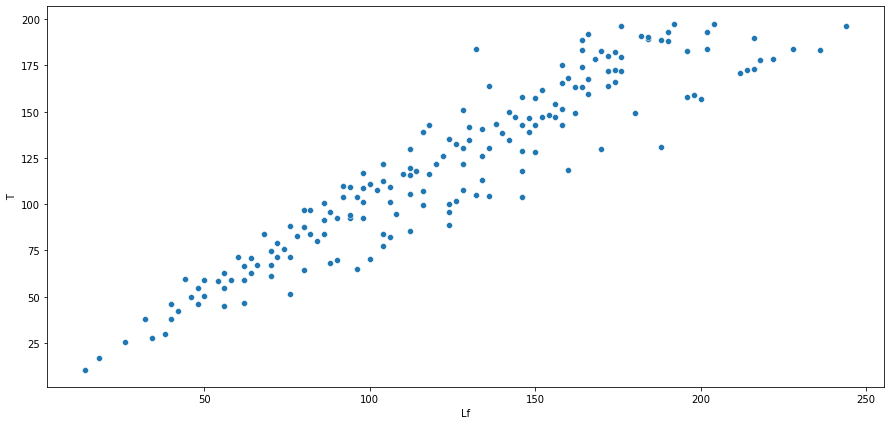

In [40]:
data_m = data[data['Stability']=='M']

plt.figure(figsize=(15,7))
sns.scatterplot(x = 'Lf', y = data['T'], data = data_m[data_m['Class']=="0.5"])
plt.title('')

## Za sve orbite

Text(0, 0.5, 'N_t')

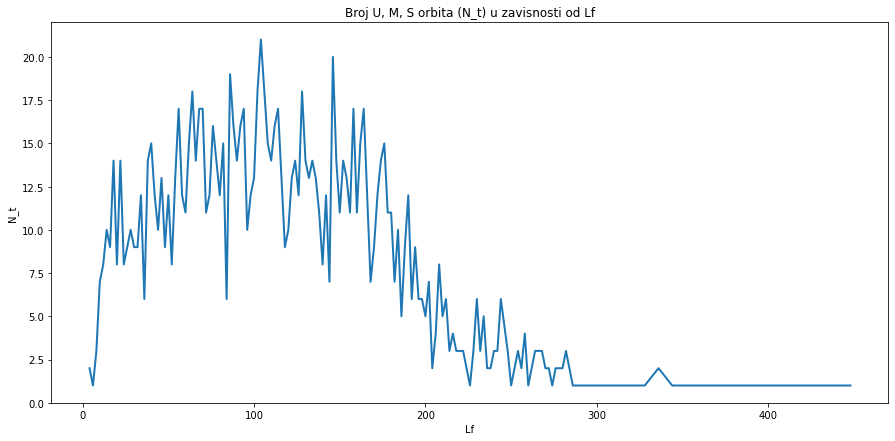

In [41]:
N_ukupno = []
N_lf = data['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno, lw=2)
plt.title('Broj U, M, S orbita (N_t) u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0, 0.5, 'N_m')

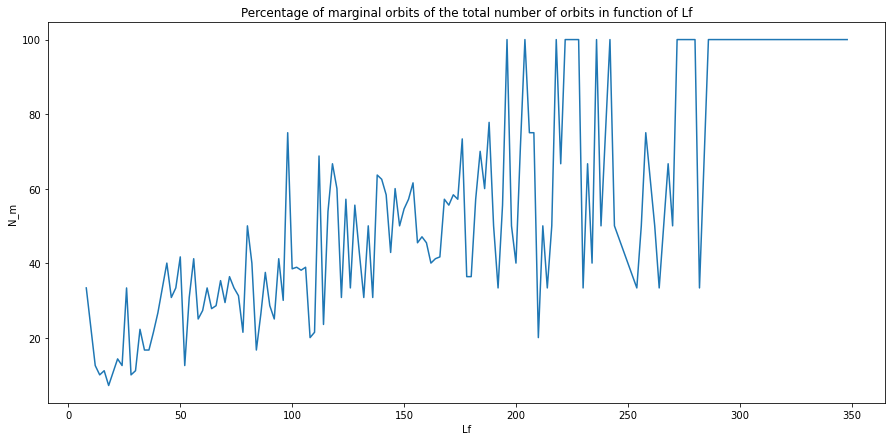

In [42]:
N_ukupno = []
#N_lf = data['Lf'].unique()
for i in data[data['Stability']=='M']['Lf'].unique():
    
    N_m = data[(data['Lf']==i) &  (data['Stability']=='M')]['T'].count()
    N_t = (data[(data['Lf']==i) &  (data['Stability']=='M')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count())
    N_ukupno.append(100*N_m/N_t)

plt.figure(figsize=(15,7))    
sns.lineplot(x=data[data['Stability']=='M']['Lf'].unique(), y=N_ukupno)
plt.title('Percentage of marginal orbits of the total number of orbits in function of Lf')
plt.xlabel('Lf')
plt.ylabel('N_m')

Text(0, 0.5, 'N_m')

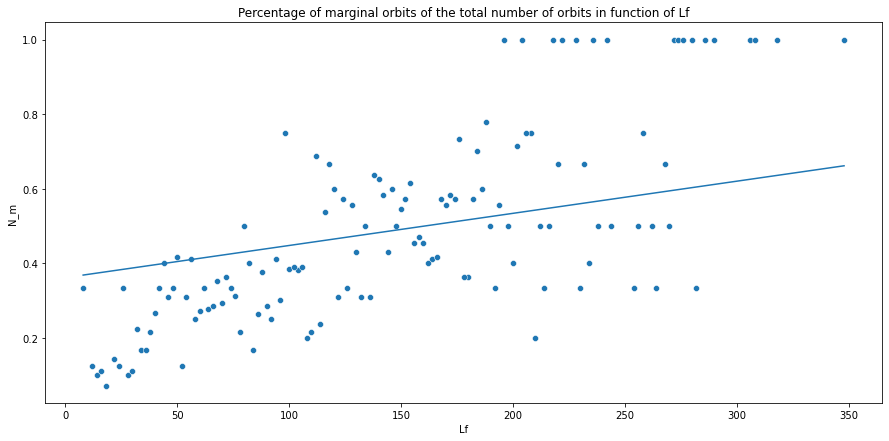

In [43]:
N_ukupno = []
#N_lf = data['Lf'].unique()
for i in data[data['Stability']=='M']['Lf'].unique():
    
    N_m = data[(data['Lf']==i) &  (data['Stability']=='M')]['T'].count()
    N_t = (data[(data['Lf']==i) &  (data['Stability']=='M')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count())
    N_ukupno.append(N_m/N_t)

x=np.array(sorted(data[data['Stability']=='M']['Lf'].unique()))
y=np.array(N_ukupno)

m, b = np.polyfit(x, y, 1)
    
plt.figure(figsize=(15,7))    
sns.scatterplot(x=data[data['Stability']=='M']['Lf'].unique(), y=N_ukupno)
plt.plot(x, m*x + b)
plt.title('Percentage of marginal orbits of the total number of orbits in function of Lf')
plt.xlabel('Lf')
plt.ylabel('N_m')



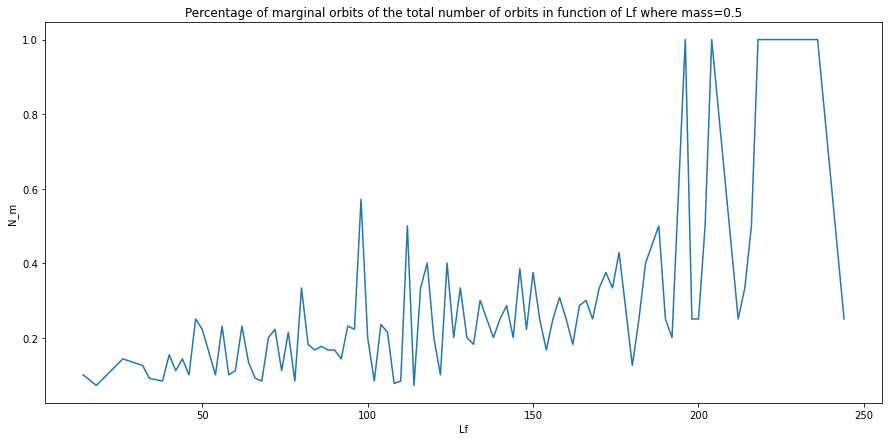

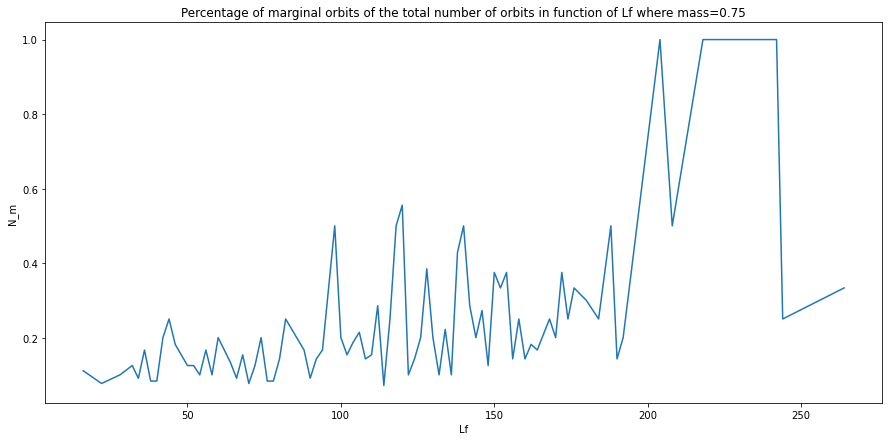

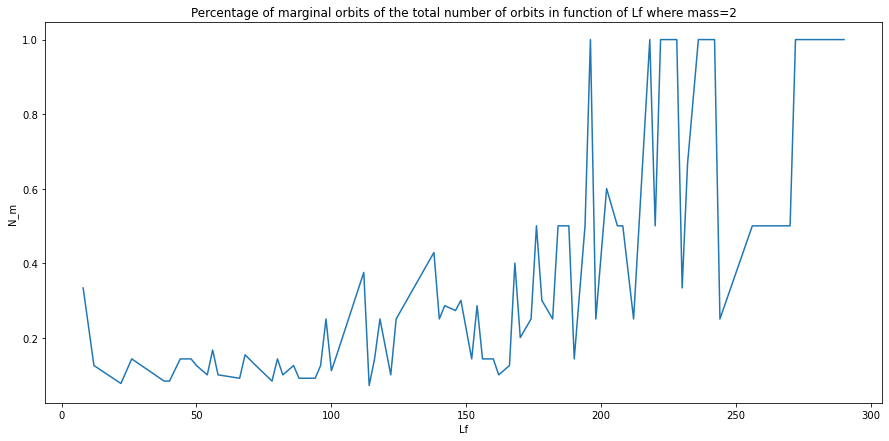

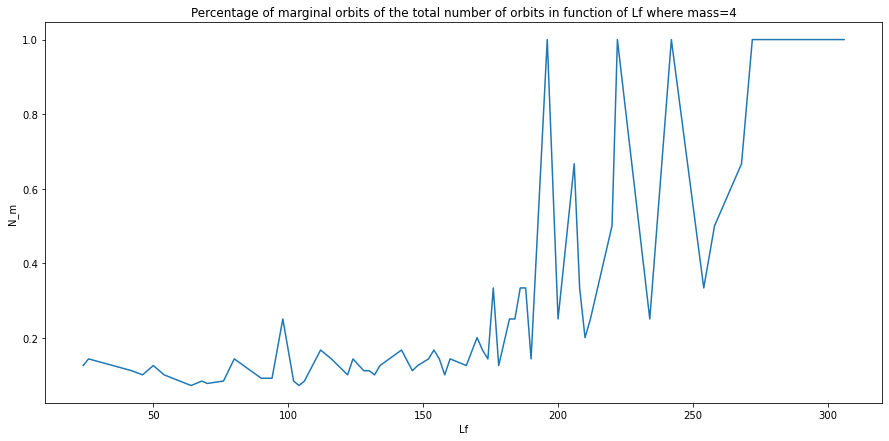

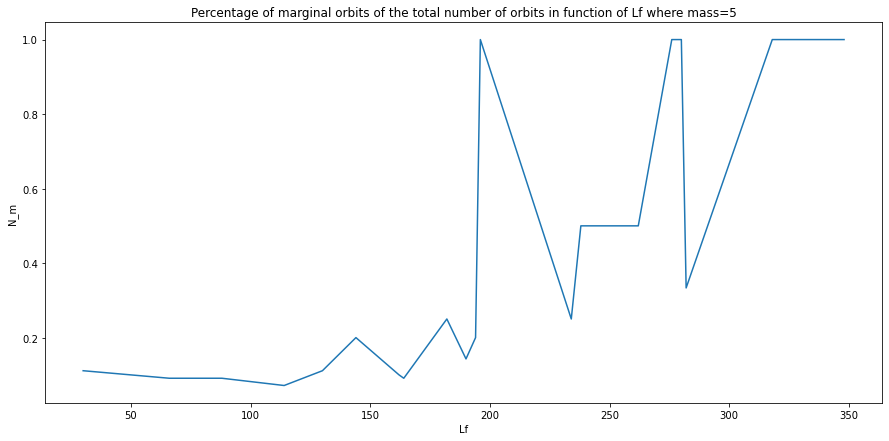

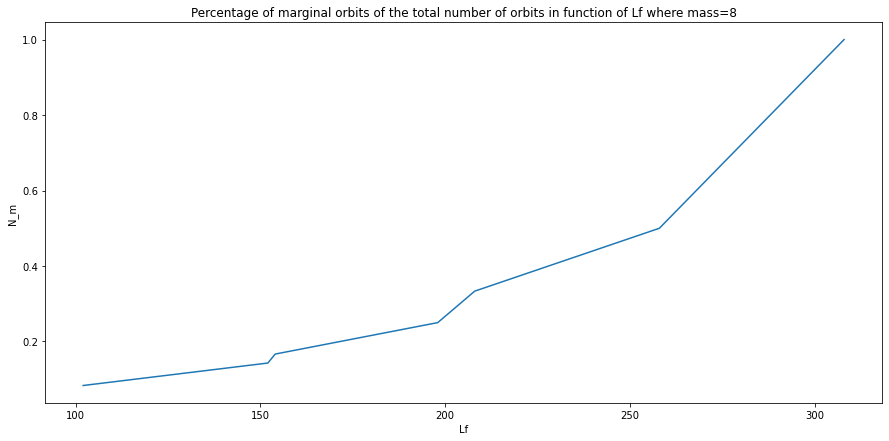

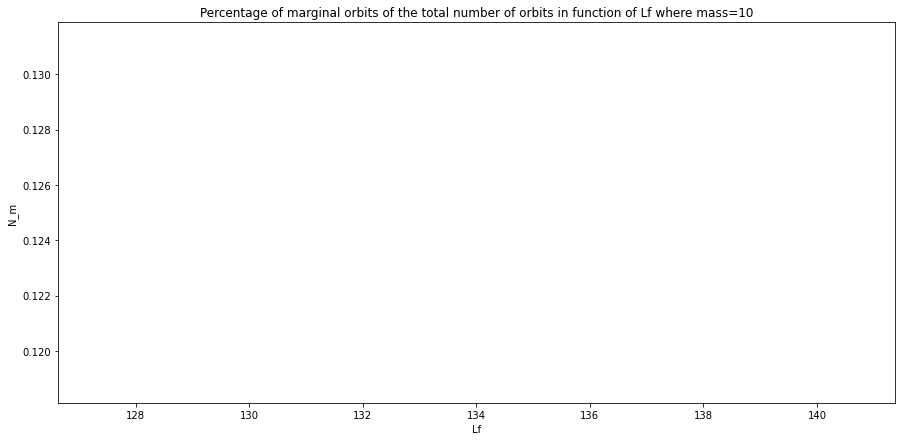

In [44]:
N_ukupno = []
#N_lf = data['Lf'].unique()
for clas in data['Class'].unique():
    for i in data[(data['Stability']=='M') & (data['Class']==clas)]['Lf'].unique():

        N_m = data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']==clas)]['T'].count()
        N_t = (data[(data['Lf']==i)  & (data['Class']==clas) &  (data['Stability']=='M')]['T'].count()
                  + data[(data['Lf']==i) &  (data['Stability']=='U')]['T'].count()
                  + data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count())
        N_ukupno.append(N_m/N_t)
    plt.figure(figsize=(15,7))    
    sns.lineplot(x= data[(data['Stability']=='M') & (data['Class']==clas)]['Lf'].unique(), y = N_ukupno)
    plt.title('Percentage of marginal orbits of the total number of orbits in function of Lf where mass={}'.format(clas))
    plt.xlabel('Lf')
    plt.ylabel('N_m')
    N_ukupno = []
    plt.show()



Text(0, 0.5, 'N_s')

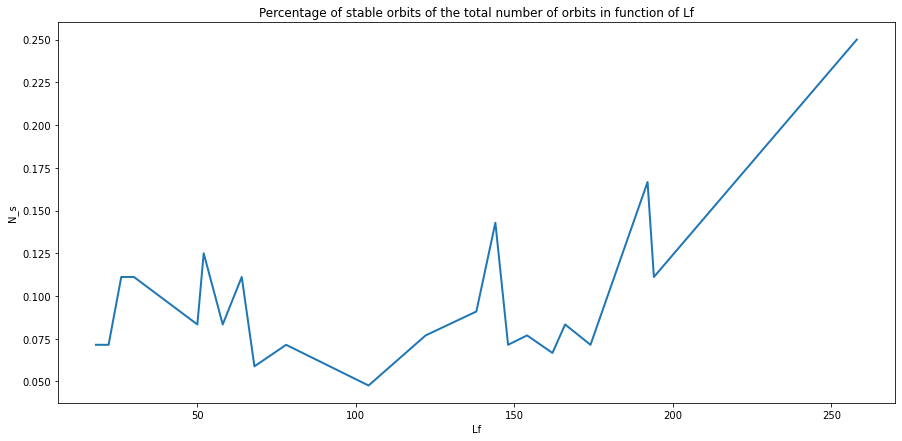

In [45]:
N_ukupno = []
#N_lf = data['Lf'].unique()
for i in data[data['Stability']=='S']['Lf'].unique():
    
    N_s = data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count()
    N_t = (data[(data['Lf']==i) &  (data['Stability']=='M')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count())
    N_ukupno.append(N_s/N_t)
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data[data['Stability']=='S']['Lf'].unique(), y=N_ukupno, lw=2)
plt.title('Percentage of stable orbits of the total number of orbits in function of Lf')
plt.xlabel('Lf')
plt.ylabel('N_s')

Text(0, 0.5, 'N_s')

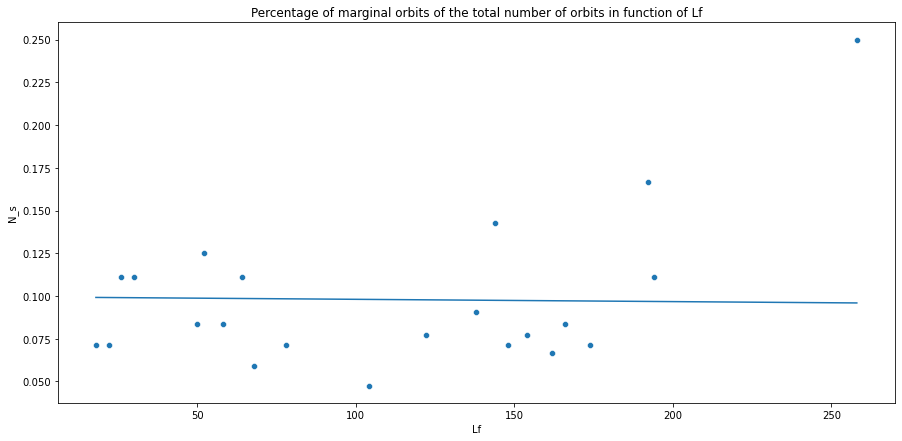

In [46]:
N_ukupno = []
#N_lf = data['Lf'].unique()
for i in data[data['Stability']=='S']['Lf'].unique():
    
    N_s = data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count()
    N_t = (data[(data['Lf']==i) &  (data['Stability']=='M')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count())
    N_ukupno.append(N_s/N_t)

x=np.array(sorted(data[data['Stability']=='S']['Lf'].unique()))
y=np.array(N_ukupno)

m, b = np.polyfit(x, y, 1)
    
plt.figure(figsize=(15,7))    
sns.scatterplot(x=data[data['Stability']=='S']['Lf'].unique(), y=N_ukupno)
plt.plot(x, m*x + b)
plt.title('Percentage of marginal orbits of the total number of orbits in function of Lf')
plt.xlabel('Lf')
plt.ylabel('N_s')



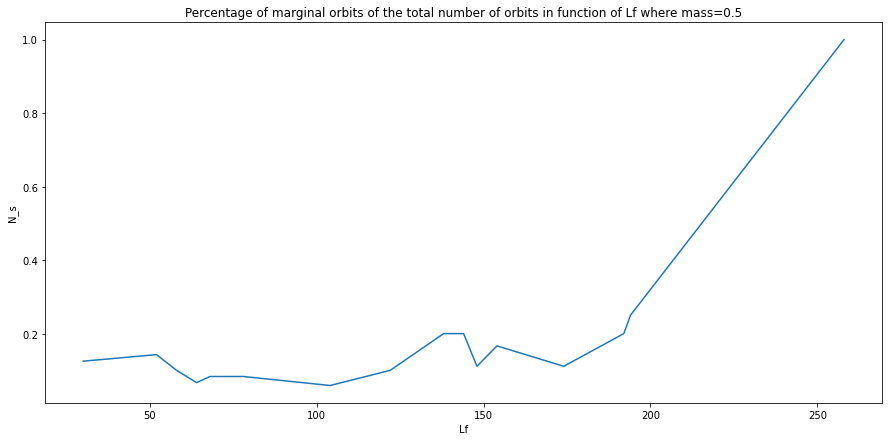

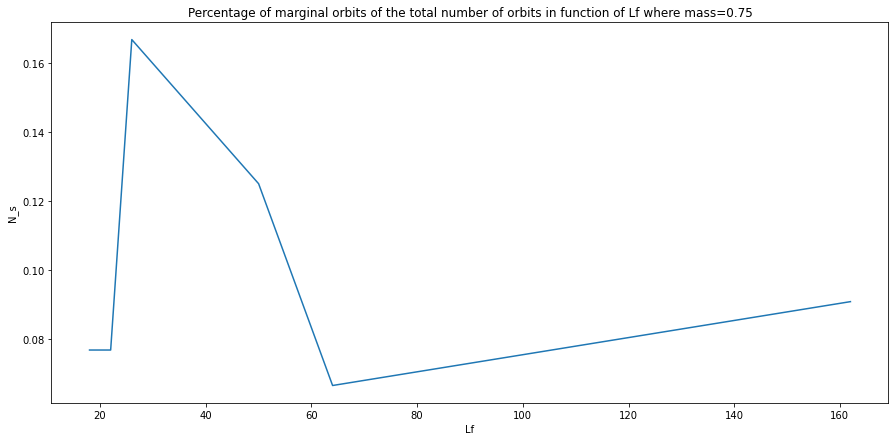

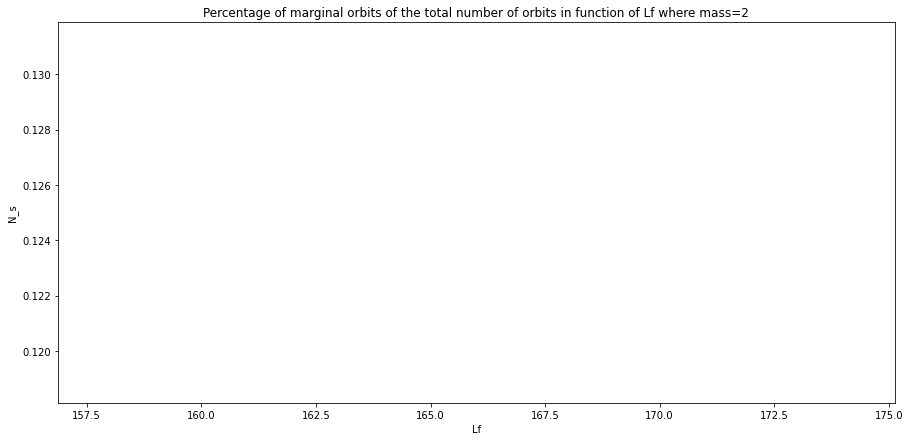

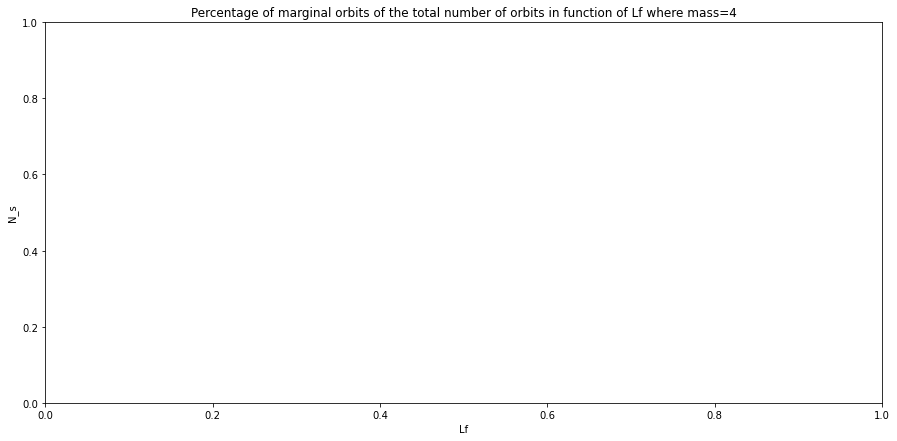

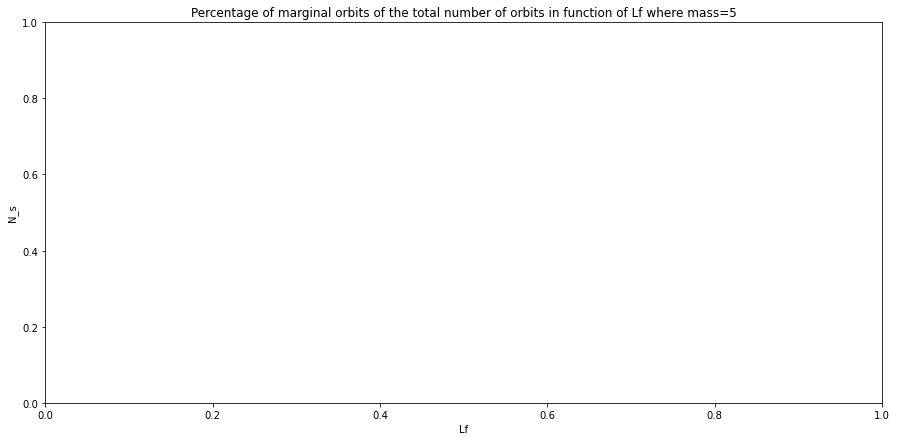

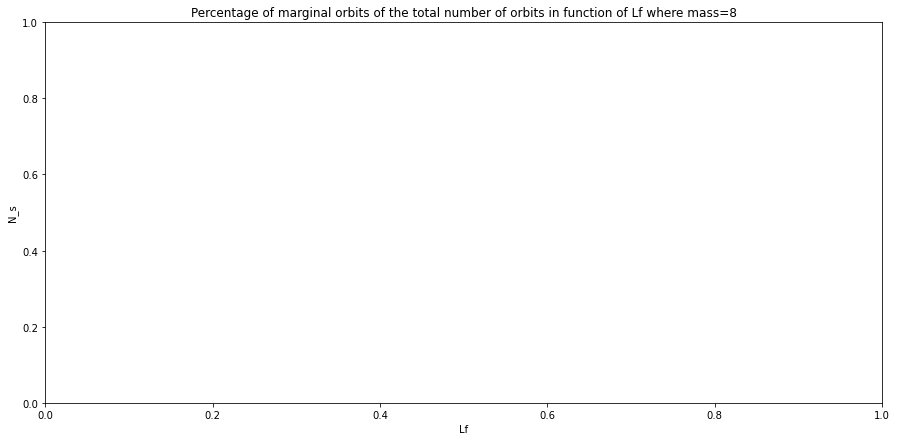

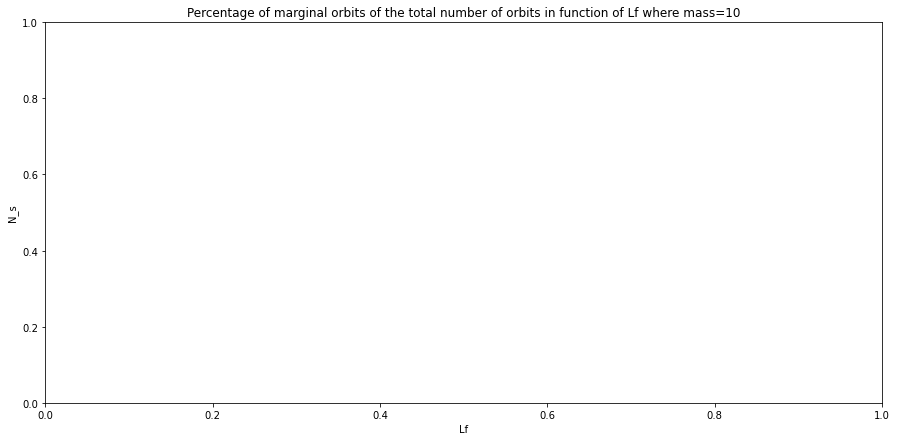

In [47]:
N_ukupno = []
#N_lf = data['Lf'].unique()
for clas in data['Class'].unique():
    for i in data[(data['Stability']=='S') & (data['Class']==clas)]['Lf'].unique():

        N_m = data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']==clas)]['T'].count()
        N_t = (data[(data['Lf']==i)  & (data['Class']==clas) &  (data['Stability']=='M')]['T'].count()
                  + data[(data['Lf']==i) &  (data['Stability']=='U')]['T'].count()
                  + data[(data['Lf']==i) &  (data['Stability']=='S')]['T'].count())
        N_ukupno.append(N_m/N_t)
    plt.figure(figsize=(15,7))
    sns.lineplot(x= data[(data['Stability']=='S') & (data['Class']==clas)]['Lf'].unique(), y = N_ukupno)
    plt.title('Percentage of marginal orbits of the total number of orbits in function of Lf where mass={}'.format(clas))
    plt.xlabel('Lf')
    plt.ylabel('N_s')
    N_ukupno = []
    plt.show()



Text(0, 0.5, 'N_t')

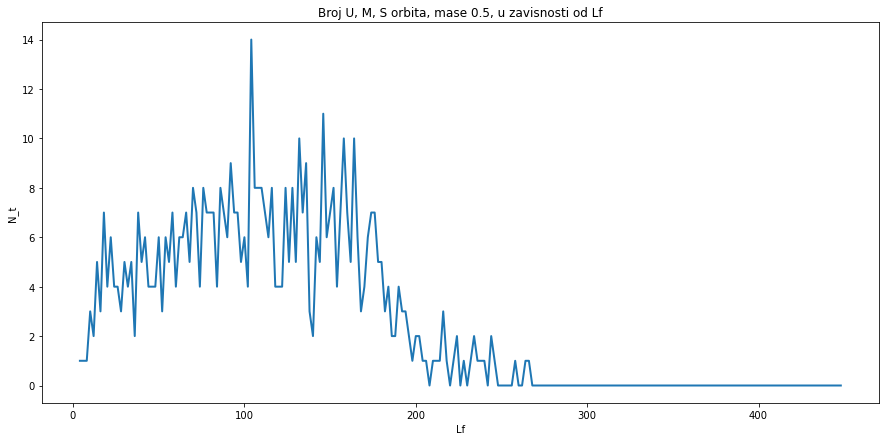

In [48]:
N_ukupno = []
N_lf = data[data['Class']=='0.5']['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']=='0.5')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U') & (data['Class']=='0.5')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']=='0.5')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno, lw=2)
plt.title('Broj U, M, S orbita, mase 0.5, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0, 0.5, 'N_t')

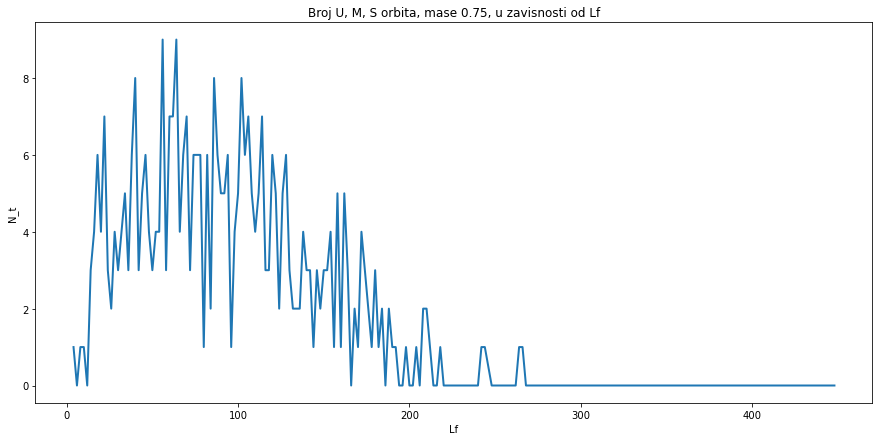

In [49]:
N_ukupno = []
N_lf = data[data['Class']=='0.75']['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']=='0.75')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U') & (data['Class']=='0.75')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']=='0.75')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno, lw=2)
plt.title('Broj U, M, S orbita, mase 0.75, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0, 0.5, 'N_t')

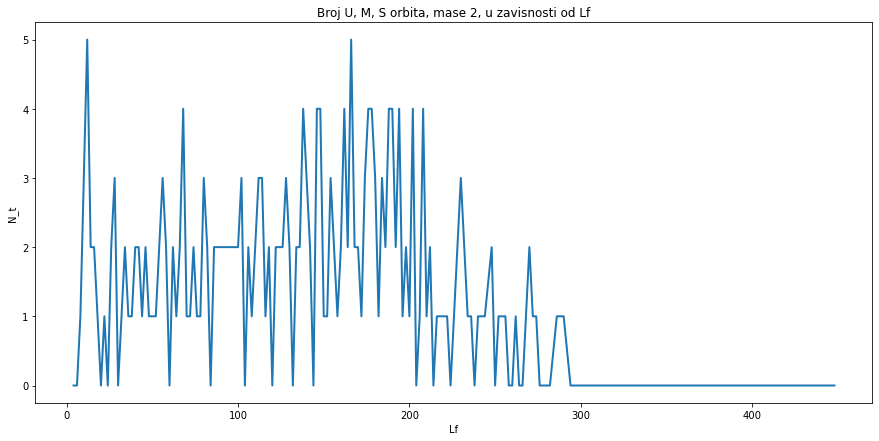

In [50]:
N_ukupno = []
N_lf = data[data['Class']=='2']['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']=='2')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U') & (data['Class']=='2')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']=='2')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno, lw=2)
plt.title('Broj U, M, S orbita, mase 2, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0, 0.5, 'N_t')

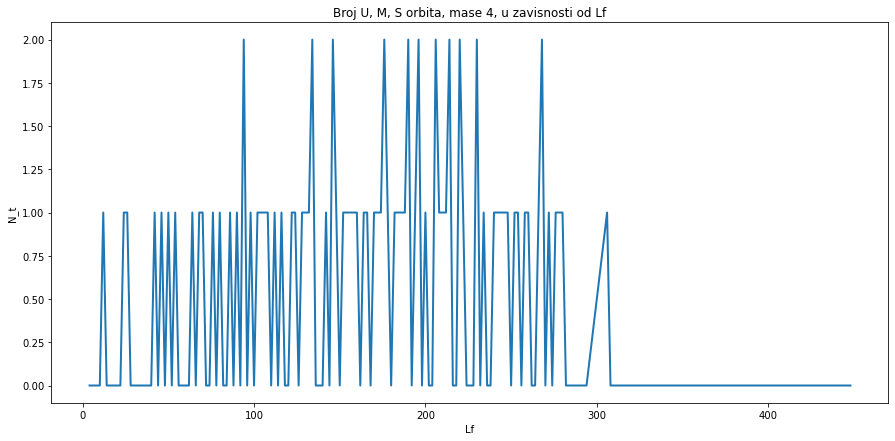

In [51]:
N_ukupno = []
N_lf = data[data['Class']=='4']['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']=='4')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U') & (data['Class']=='4')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']=='4')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno, lw=2, err_style="bars", ci=68)
plt.title('Broj U, M, S orbita, mase 4, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0, 0.5, 'N_t')

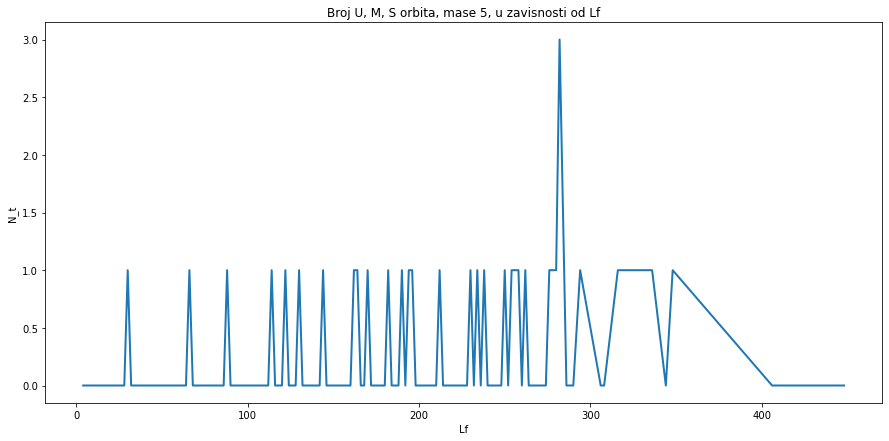

In [52]:
N_ukupno = []
N_lf = data[data['Class']=='5']['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']=='5')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U') & (data['Class']=='5')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']=='5')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno, lw=2, err_style="bars", ci=68)
plt.title('Broj U, M, S orbita, mase 5, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0, 0.5, 'N_t')

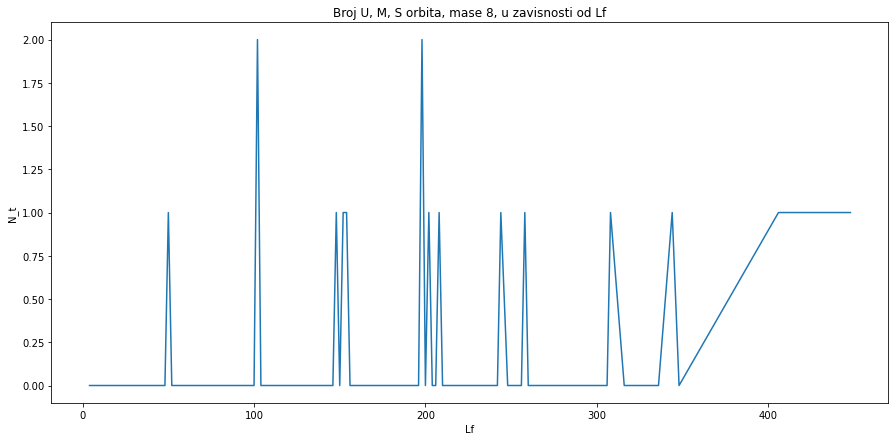

In [53]:
N_ukupno = []
N_lf = data[data['Class']=='8']['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']=='8')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U') & (data['Class']=='8')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']=='8')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno)
plt.title('Broj U, M, S orbita, mase 8, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0, 0.5, 'N_t')

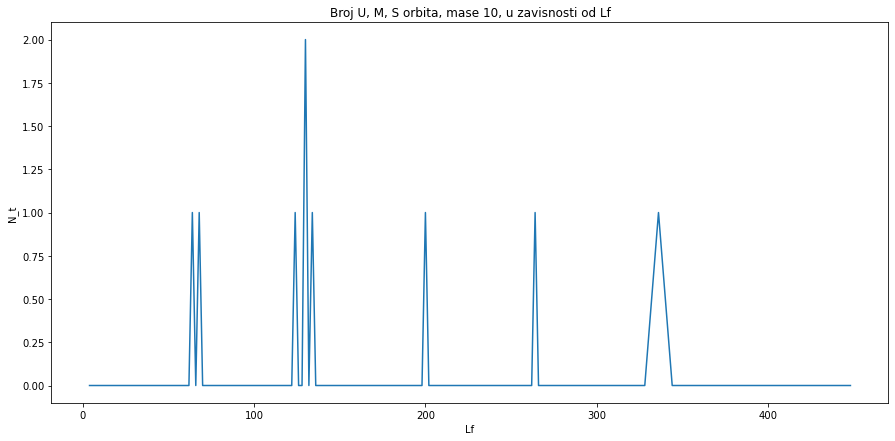

In [54]:
N_ukupno = []
N_lf = data[data['Class']=='10']['Lf'].unique()
for i in data['Lf'].unique():
    
    N_ukupno.append(data[(data['Lf']==i) &  (data['Stability']=='M') & (data['Class']=='10')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='U') & (data['Class']=='10')]['T'].count()
              + data[(data['Lf']==i) &  (data['Stability']=='S') & (data['Class']=='10')]['T'].count())
    
plt.figure(figsize=(15,7))    
sns.lineplot(x=data['Lf'].unique(), y=N_ukupno)
plt.title('Broj U, M, S orbita, mase 10, u zavisnosti od Lf')
plt.xlabel('Lf')
plt.ylabel('N_t')

Text(0.5, 1.0, '')

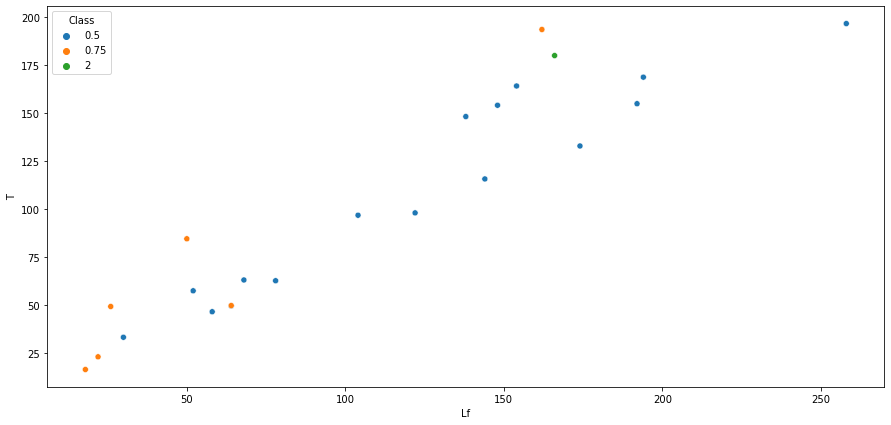

In [55]:
data_m = data[data['Stability']=='S']

plt.figure(figsize=(15,7))
sns.scatterplot(x = 'Lf', y = data['T'], data = data_m, hue='Class')
plt.title('')

Text(0.5, 1.0, '')

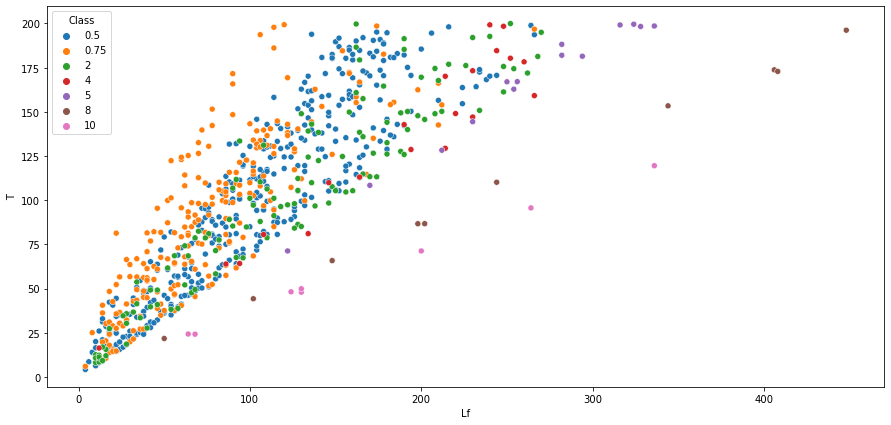

In [56]:
data_m = data[data['Stability']=='U']

plt.figure(figsize=(15,7))
sns.scatterplot(x = 'Lf', y = data['T'], data = data_m, hue='Class')
plt.title('')

## Racunanje T*

In [57]:
v1 = 0.3489049
v2 = 0.53063051
m3 = 1


E = (v1**2 + v2**2) * (1 + 2/m3) - (0.5+2*m3)

#print(E**(3/2))
print(abs(pow(E, 3/2))*6.34904739)
    

9.303332233097986


In [58]:
data_iste = pd.read_excel('isteMasev3_removed_tabele.xlsx')
#data_iste = data.parse(header=None)
data_iste.columns

Index(['Class and number', 'x1', 'x2', 'v1', 'v2', 'T'], dtype='object')

In [59]:
def calc_t(data_iste):
    E = (data_iste['v1']**2 + data_iste['v2']**2) * (1 + 2) - (0.5+2)
    return abs(pow(E, 3/2))*data_iste['T']

data_iste['T*'] = data_iste.apply(calc_t, axis=1)
    



In [60]:
data_iste

Class and number        x1        x2        v1        v2           T  \
0              I.A-1 -1.002428  0.004170  0.348905  0.530631    6.349047   
1              I.A-2 -1.000558 -0.002924  0.306439  0.126367    6.239930   
2              I.A-3 -0.982700 -0.031520  0.603056  0.546675   36.384295   
3              I.A-4 -0.996456  0.005192  0.540683  0.339250   26.776240   
4              I.A-5 -0.972096 -0.070496  0.396412  0.293566   19.965078   
..               ...       ...       ...       ...       ...         ...   
690         II.C-296 -0.999783 -0.000679  0.307346  0.275469  199.830392   
691         II.C-297 -1.000158  0.001427  0.339920  0.107373  189.090683   
692         II.C-298 -0.999940 -0.000272  0.246066  0.245772  191.005439   
693         II.C-299 -1.000016  0.000601  0.247148  0.243555  197.191596   
694         II.C-300 -0.999046 -0.007639  0.325204  0.117031  198.416484   

             T*  
0      9.303332  
1     19.951845  
2     13.345730  
3     38.672363  
4     47.015594  
..          ...  
690  560.534439  
691  583.173661  
692  596.755032  
693  616.797141  
694  621.866260  

[695 rows x 7 columns]

## Tabela sa dodatom masom 1

In [61]:
#data_iste.to_csv('masaJedan.csv')

In [62]:
df = pd.read_csv('combined_masa.csv')

In [63]:
df

Unnamed: 0  Index  Class SubClass        v1        v2           T  \
0            0.0    1.0   -0.5      A.1  0.286924  0.079185    4.176129   
1            1.0    2.0   -0.5      A.1  0.342031  0.180937   13.915334   
2            2.0    3.0   -0.5      A.1  0.369772  0.191007   25.944195   
3            3.0    4.0   -0.5      A.1  0.200966  0.243108   19.013416   
4            4.0    5.0   -0.5      A.1  0.261324  0.235624   28.435858   
...          ...    ...    ...      ...       ...       ...         ...   
2009         NaN    NaN    1.0      NaN  0.246125  0.245698  191.022662   
2010         NaN    NaN    1.0      NaN  0.247004  0.243706  197.186956   
2011         NaN    NaN    1.0      NaN  0.325938  0.114488  198.692018   
2012         NaN    NaN    1.0      NaN  0.325938  0.114488  198.692018   
2013         NaN    NaN    1.0      NaN  0.325938  0.114488  198.692018   

           T*   Lf Stability        mi                 Slova  
0       4.538    4         U  0.315879                  BabA  
1       9.063    8         U   1.97222              BaBabAbA  
2      13.095   12         U  2.314004          BaBaBabAbAbA  
3      19.086   16         U  6.927685      BaBAbaBabAbaBAbA  
4      23.513   20         U  1.109487  BaBAbAbaBabAbaBaBAbA  
...       ...  ...       ...       ...                   ...  
2009  596.818  240       NaN       NaN                   NaN  
2010  616.780  248       NaN       NaN                   NaN  
2011  622.874  250       NaN       NaN                   NaN  
2012  622.874  250       NaN       NaN                   NaN  
2013  622.874  250       NaN       NaN                   NaN  

[2014 rows x 12 columns]

In [64]:
diC = {-0.50: "0.5", -0.75: "0.75", -2.00: "2", -4.00: "4", -5.00:"5", -8.0: "8", -10.00: "10", 1:"1"}
df = df.replace({"Class": diC})
#df.to_csv('finalnaTabela.csv', index=False)

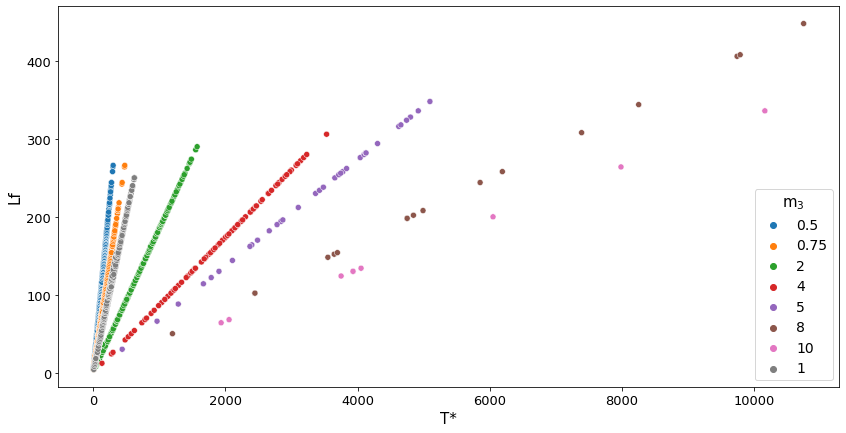

In [65]:
plt.figure(figsize=(14,7))
plot = sns.scatterplot(x = 'T*', y = 'Lf', data = df, hue='Class')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('T*', fontsize=15)
plt.ylabel('Lf', fontsize=15)
plt.legend(title=r'$\mathrm{m}_{3}$', loc='lower right', fontsize='13')
plt.setp(plot.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='15') # for legend title
plt.show()

Text(0.5, 1.0, 'T* in function of Lf divided by different masses')

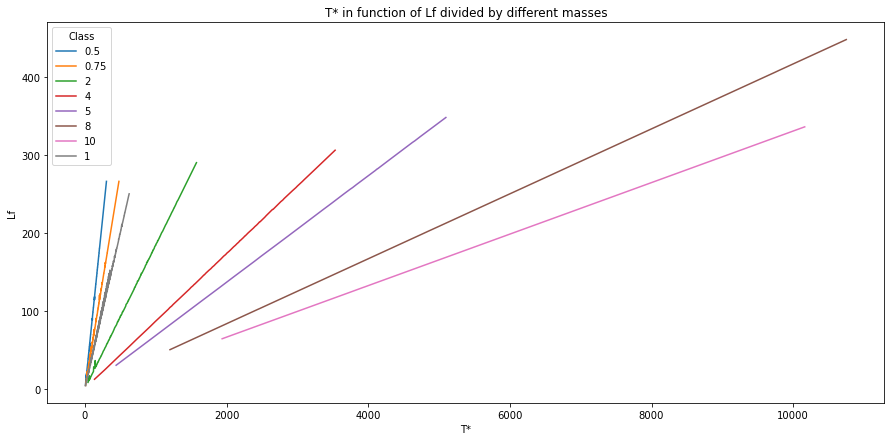

In [66]:
plt.figure(figsize=(15,7))
sns.lineplot(x = 'T*', y = 'Lf', data = df, hue='Class')
plt.title('T* in function of Lf divided by different masses')

Text(0.5, 1.0, 'T* in function of Lf divided by different masses')

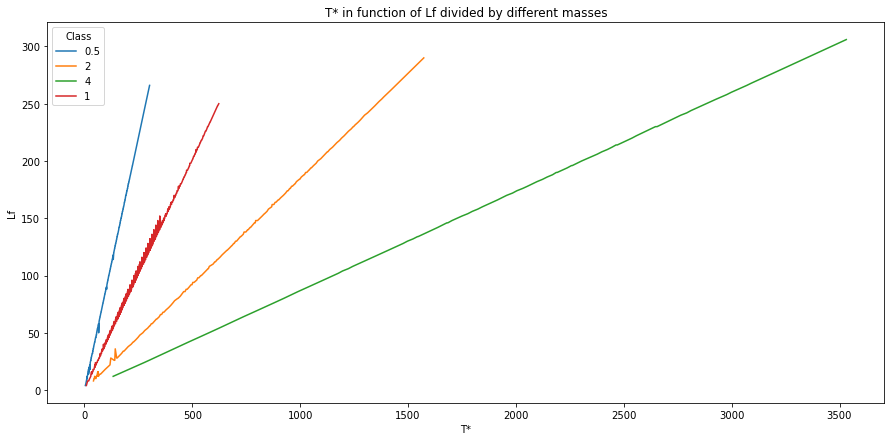

In [67]:

plt.figure(figsize=(15,7))
sns.lineplot(x = 'T*', y = 'Lf', data = df[df['Class'].isin(['0.5', '1', '2', '4'])], hue='Class')
plt.title('T* in function of Lf divided by different masses')

In [68]:
df['Stability'].value_counts()

U    765
M    529
S     23
Name: Stability, dtype: int64

In [69]:
len(df[(df['Stability']=='M') & (df['Lf']>10) & (df['Lf']<=20)])

4

In [70]:
df_lf = df.groupby(["Lf","Stability"]).count().reset_index()

In [71]:
df_lf

Lf Stability  Unnamed: 0  Index  Class  SubClass  v1  v2  T  T*  mi  \
0      4         U           2      2      2         2   2   2  2   2   2   
1      6         U           1      1      1         1   1   1  1   1   1   
2      8         M           1      1      1         1   1   1  1   1   1   
3      8         U           2      2      2         2   2   2  2   2   2   
4     10         U           7      7      7         7   7   7  7   7   7   
..   ...       ...         ...    ...    ...       ...  ..  .. ..  ..  ..   
284  344         U           1      1      1         1   1   1  1   1   1   
285  348         M           1      1      1         1   1   1  1   1   1   
286  406         U           1      1      1         1   1   1  1   1   1   
287  408         U           1      1      1         1   1   1  1   1   1   
288  448         U           1      1      1         1   1   1  1   1   1   

     Slova  
0        2  
1        1  
2        1  
3        2  
4        7  
..     ...  
284      1  
285      1  
286      1  
287      1  
288      1  

[289 rows x 12 columns]

In [72]:
stability_n = {}
stability_s = {}
stability_all = {}
for i in range(0, 350, 10):
    stability_n[str(i) + '-' + str(i+10)] = len(df[(df['Stability']=='M') & (df['Lf']>i) & (df['Lf']<=i+10)])
    stability_s[str(i) + '-' + str(i+10)] = len(df[(df['Stability']=='S') & (df['Lf']>i) & (df['Lf']<=i+10)])
    stability_all[str(i) + '-' + str(i+10)] = len(df[(df['Lf']>i) & (df['Lf']<=i+10)])


529


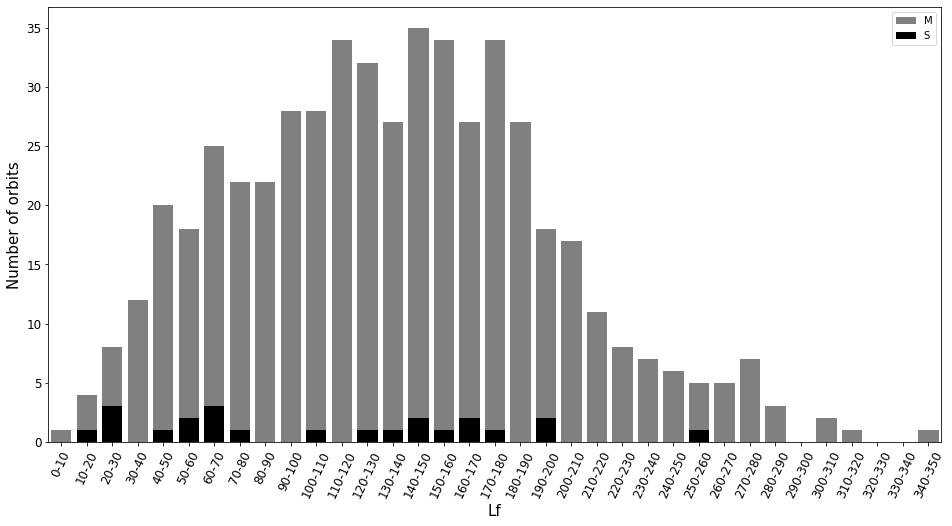

In [73]:
keys = list(stability_n.keys())
# get values in the same order as keys, and parse percentage values
vals = [int(stability_n[k]) for k in keys]

keys_s = list(stability_s.keys())
# get values in the same order as keys, and parse percentage values
vals_s = [int(stability_s[k]) for k in keys]
print(sum(vals))

plt.figure(figsize=(16,8))
sns.barplot(x=keys, y=vals, color='grey', label='M')
sns.barplot(x=keys_s, y=vals_s, color='black', label='S')

#plt.legend(title='Stability', labels=['M','S'], fill =c("grey", "black"))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=65)
plt.xlabel('Lf', fontsize=15)
plt.ylabel('Number of orbits', fontsize=15)
plt.legend()

In [74]:
df['Class'].value_counts()

1       697
0.5     565
0.75    373
2       233
4        85
5        35
8        17
10        9
Name: Class, dtype: int64

In [75]:
df

Unnamed: 0  Index Class SubClass        v1        v2           T  \
0            0.0    1.0   0.5      A.1  0.286924  0.079185    4.176129   
1            1.0    2.0   0.5      A.1  0.342031  0.180937   13.915334   
2            2.0    3.0   0.5      A.1  0.369772  0.191007   25.944195   
3            3.0    4.0   0.5      A.1  0.200966  0.243108   19.013416   
4            4.0    5.0   0.5      A.1  0.261324  0.235624   28.435858   
...          ...    ...   ...      ...       ...       ...         ...   
2009         NaN    NaN     1      NaN  0.246125  0.245698  191.022662   
2010         NaN    NaN     1      NaN  0.247004  0.243706  197.186956   
2011         NaN    NaN     1      NaN  0.325938  0.114488  198.692018   
2012         NaN    NaN     1      NaN  0.325938  0.114488  198.692018   
2013         NaN    NaN     1      NaN  0.325938  0.114488  198.692018   

           T*   Lf Stability        mi                 Slova  
0       4.538    4         U  0.315879                  BabA  
1       9.063    8         U   1.97222              BaBabAbA  
2      13.095   12         U  2.314004          BaBaBabAbAbA  
3      19.086   16         U  6.927685      BaBAbaBabAbaBAbA  
4      23.513   20         U  1.109487  BaBAbAbaBabAbaBaBAbA  
...       ...  ...       ...       ...                   ...  
2009  596.818  240       NaN       NaN                   NaN  
2010  616.780  248       NaN       NaN                   NaN  
2011  622.874  250       NaN       NaN                   NaN  
2012  622.874  250       NaN       NaN                   NaN  
2013  622.874  250       NaN       NaN                   NaN  

[2014 rows x 12 columns]

Text(0, 0.5, 'Number of S orbits')

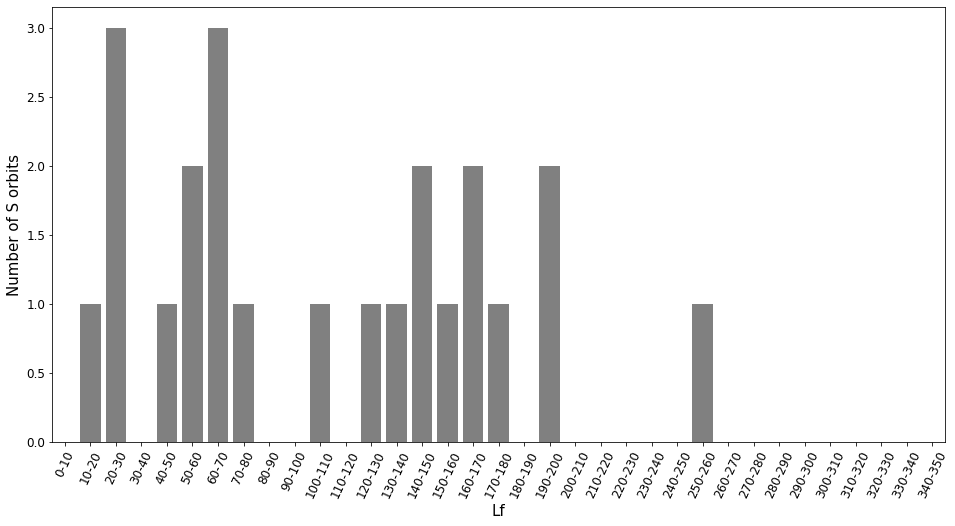

In [76]:
keys = list(stability_s.keys())
# get values in the same order as keys, and parse percentage values
vals = [int(stability_s[k]) for k in keys]

plt.figure(figsize=(16,8))
sns.barplot(x=keys, y=vals, color='grey')


plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=65)
plt.xlabel('Lf', fontsize=15)
plt.ylabel('Number of S orbits', fontsize=15)

Text(0, 0.5, 'Number of all orbits')

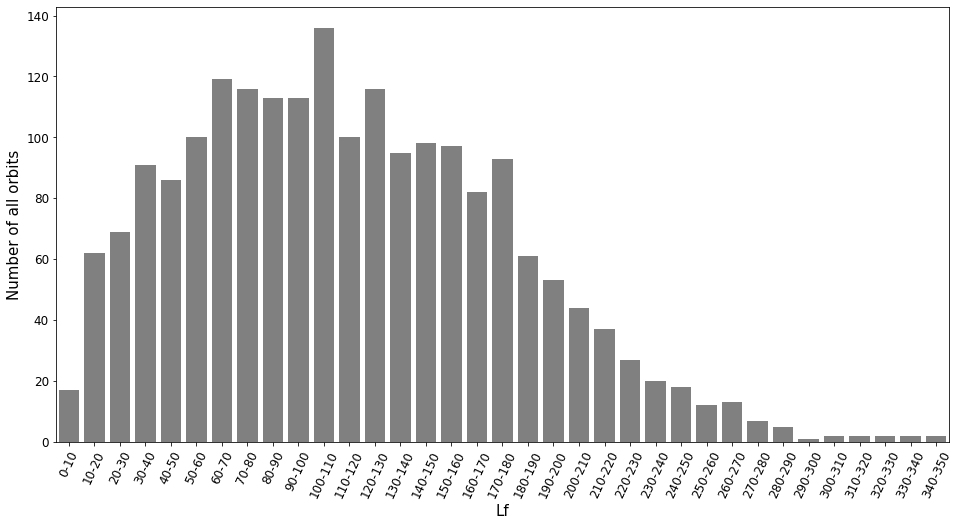

In [77]:
keys = list(stability_all.keys())
# get values in the same order as keys, and parse percentage values
vals = [int(stability_all[k]) for k in keys]


plt.figure(figsize=(16,8))
sns.barplot(x=keys, y=vals, color='grey')
#sns.barplot(x=keys_s, y=vals_s, color='black', label='S')

#plt.legend(title='Stability', labels=['M','S'], fill =c("grey", "black"))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=65)
plt.xlabel('Lf', fontsize=15)
plt.ylabel('Number of all orbits', fontsize=15)

Text(0, 0.5, 'Number of orbits')

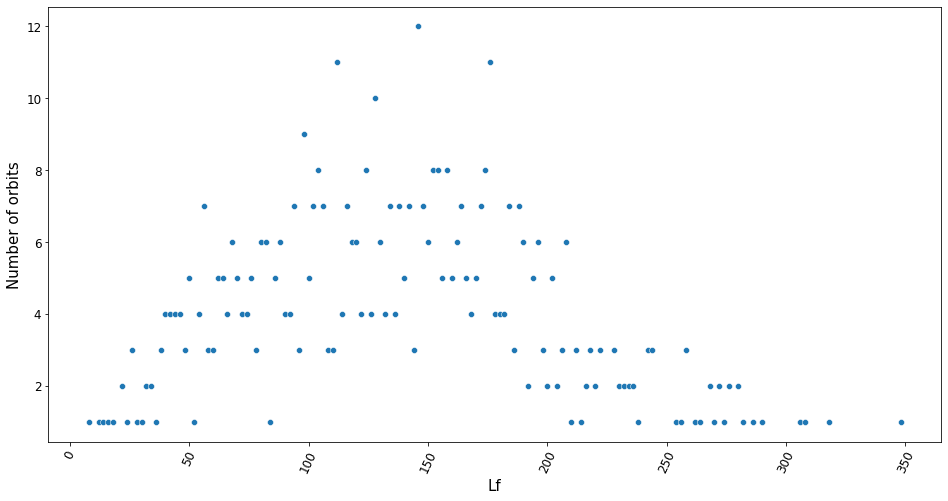

In [78]:
keys = list(stability_n.keys())
# get values in the same order as keys, and parse percentage values
vals = [int(stability_n[k]) for k in keys]

plt.figure(figsize=(16,8))
sns.scatterplot(x='Lf', y = 'T*', data=df_lf[df_lf['Stability']=='M'])

plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=65)
plt.xlabel('Lf', fontsize=15)
plt.ylabel('Number of orbits', fontsize=15)

In [79]:
df['Stability'].value_counts()

U    765
M    529
S     23
Name: Stability, dtype: int64

In [223]:
def calc_freq_s(row):
    return int(df[(df['Class']==row) & (df['Stability']=='M')]['Stability'].count())

df['Stability_frequency'] = df['Class'].apply(calc_freq_s)

In [224]:
df['Stability_frequency'] 

0       179
1       179
2       179
3       179
4       179
       ... 
2009      0
2010      0
2011      0
2012      0
2013      0
Name: Stability_frequency, Length: 2014, dtype: int64

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


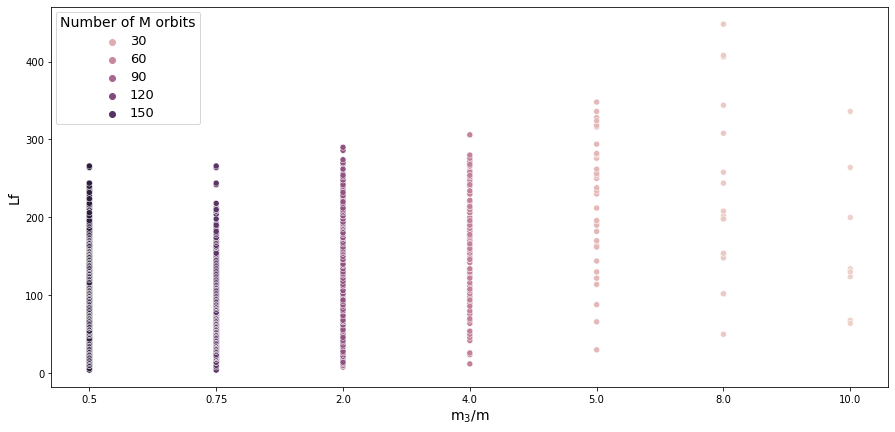

In [235]:
plt.figure(figsize=(15,7))

plot = sns.scatterplot(df['Class'], df['Lf'], data=df[df['Stability'].isin(['M','U'])], hue='Stability_frequency')
plt.xlabel(r'$\mathrm{m}_{3}/\mathrm{m}$', fontsize='14')
plt.ylabel('Lf', fontsize='14')
plt.legend(title='Number of M orbits')
plt.setp(plot.get_legend().get_texts(), fontsize='13') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='14') # for legend title

plt.show()

## Racunanje konstante

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1317 non-null   float64
 1   Index       1317 non-null   float64
 2   Class       2014 non-null   object 
 3   SubClass    1317 non-null   object 
 4   v1          2014 non-null   float64
 5   v2          2014 non-null   float64
 6   T           2014 non-null   float64
 7   T*          2014 non-null   float64
 8   Lf          2014 non-null   int64  
 9   Stability   1317 non-null   object 
 10  mi          1317 non-null   object 
 11  Slova       1317 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 188.9+ KB


In [81]:
df['Class'] = df['Class'].astype(float)

In [82]:
df['Class'] = abs(df['Class'])
df['Class'].unique()


array([ 0.5 ,  0.75,  2.  ,  4.  ,  5.  ,  8.  , 10.  ,  1.  ])

In [83]:
df['Const'] = df['T*'].astype(float)/(df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.01+np.power(df['Class'],2))))))
df['Const']

0       1.296642
1       1.294784
2       1.247210
3       1.363360
4       1.343673
          ...   
2009    6.513572
2010    6.514291
2011    6.526025
2012    6.526025
2013    6.526025
Name: Const, Length: 2014, dtype: float64

In [84]:
df['Const_m'] = df['T*'].astype(float)/(df['Class']*df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.01+np.power(df['Class'],2))))))
df['Const_m']

0       2.593283
1       2.589569
2       2.494421
3       2.726719
4       2.687345
          ...   
2009    6.513572
2010    6.514291
2011    6.526025
2012    6.526025
2013    6.526025
Name: Const_m, Length: 2014, dtype: float64

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$T|E|^{3/2})/[Lf*\\mathrm{tan}(\\phi(\\mathrm{m}_{3}/\\mathrm{m})))]$')

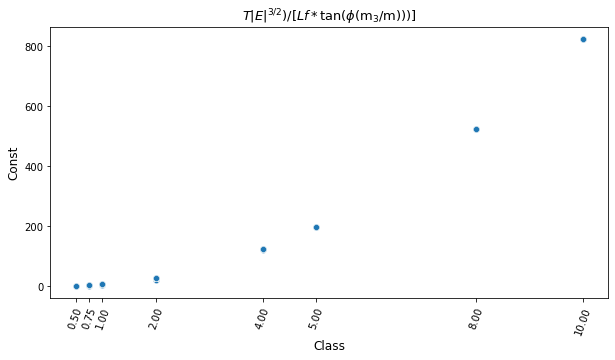

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Class'], df['Const'], data=df)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Const',fontsize=12)
plt.xticks(df['Class'].unique(), rotation=70)
plt.title(r'$T|E|^{3/2})/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m})))]$', fontsize=13)

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$T|E|^{3/2})/[Lf*\\mathrm{tan}(\\phi(\\mathrm{m}_{3}/\\mathrm{m}))*\\mathrm{m}_{3}]$')

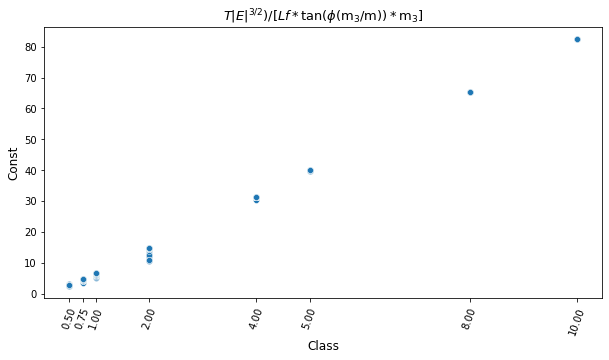

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Class'], df['Const_m'], data=df)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Const',fontsize=12)
plt.xticks(df['Class'].unique(), rotation=70)
plt.title(r'$T|E|^{3/2})/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m}))*\mathrm{m}_{3}]$', fontsize=13)

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$T|E|^{3/2}/[Lf*\\mathrm{tan}(\\phi(\\mathrm{m}_{3}/\\mathrm{m})))]$')

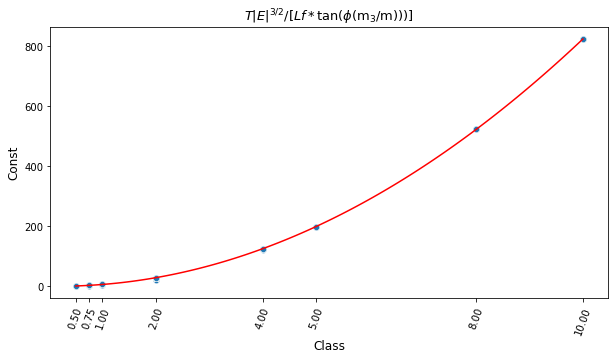

In [87]:
from scipy.interpolate import BSpline, make_interp_spline
x_new = np.linspace(0.5, 10, 100)
lines = df.groupby(by=['Class'])['Const'].mean()
lines = list(lines)
masses = sorted(df['Class'].unique())

a_BSpline = make_interp_spline(masses, lines)
y_new = a_BSpline(x_new)

plt.figure(figsize=(10,5))
sns.scatterplot(df['Class'], df['Const'], data=df)
sns.lineplot(x_new, y_new,color='red')
plt.xlabel('Class',fontsize=12)
plt.ylabel('Const',fontsize=12)
plt.xticks(df['Class'].unique(), rotation=70)
plt.title(r'$T|E|^{3/2}/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m})))]$', fontsize=13)

In [88]:
lines = df.groupby(by=['Class'])['Const'].mean()
list(lines)

[1.299409928747707,
 3.371716042734777,
 6.371662462983809,
 28.97779463244197,
 125.48305025843254,
 199.34777453267245,
 523.3692963881206,
 824.9188503069545]

In [89]:
lines = df.groupby(by=['Class'])['Const_m'].mean()
list(lines)

[2.598819857495414,
 4.495621390313035,
 6.371662462983809,
 14.488897316220985,
 31.370762564608135,
 39.869554906534496,
 65.42116204851507,
 82.49188503069543]

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$T|E|^{3/2})/[Lf*\\mathrm{tan}(\\phi(\\mathrm{m}_{3}/\\mathrm{m}))*\\mathrm{m}_{3}]$')

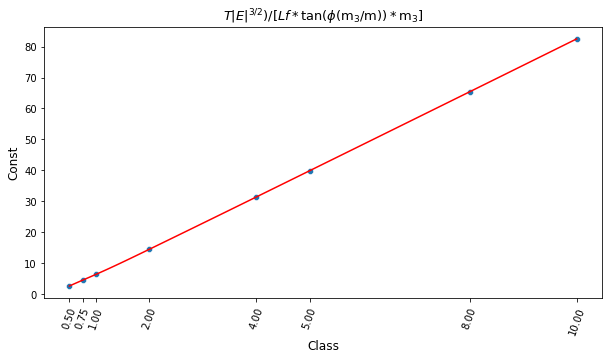

In [90]:
from scipy.interpolate import BSpline, make_interp_spline
x_new = np.linspace(0.5, 10, 100)
lines = df.groupby(by=['Class'])['Const_m'].mean()
lines = list(lines)
masses = sorted(df['Class'].unique())

a_BSpline = make_interp_spline(masses, lines)
y_new = a_BSpline(x_new)

plt.figure(figsize=(10,5))
sns.scatterplot(masses, lines)
sns.lineplot(x_new, y_new,color='red')
plt.xlabel('Class',fontsize=12)
plt.ylabel('Const',fontsize=12)
plt.xticks(df['Class'].unique(), rotation=70)
plt.title(r'$T|E|^{3/2})/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m}))*\mathrm{m}_{3}]$', fontsize=13)

In [91]:
df['Const_man'] = df['T*'].astype(float)/(df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.01+np.power(df['Class'],2))))))
df['Const_man'] = df['Const_man']/(3.613048644916136 - 3.97102867585619*df['Class']  + 8.612460756414029*df['Class']**2) # 3.613048644916136` - 3.97102867585619` x + 8.612460756414029` x^2

In [92]:
df['Const_2m'] = df['T*'].astype(float)/(df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.01+np.power(df['Class'],2))))))
df['Const_2m'] = df['Const_2m']/df['Class']**2 

In [93]:
df['Const_ch'] = df['T*'].astype(float)/(df['Lf'].astype(int)*(df['Class']*3.074 - 0.617))

In [94]:
df['Const_ch']
lines_ch = df.groupby(by=['Class'])['Const_ch'].mean()

x = list(lines_ch)
print(x)
from sklearn import preprocessing
normalized_arr = preprocessing.normalize([x])
print(normalized_arr)

[1.2357849480426224, 1.0507994256847715, 0.9900544228996894, 0.9697819245238428, 0.9869552865071197, 0.9920862202066922, 1.0007517018487173, 1.0041127181813558]
[[0.42337069 0.35999603 0.33918525 0.33224004 0.33812351 0.33988133
  0.34285006 0.34400152]]


In [95]:
df['Const_ch']
lines_ch_mean = df.groupby(by=['Class'])['Const_ch'].mean()
lines_ch_std = df.groupby(by=['Class'])['Const_ch'].std()
print(lines_ch_mean)
print(lines_ch_std)

Class
0.50     1.235785
0.75     1.050799
1.00     0.990054
2.00     0.969782
4.00     0.986955
5.00     0.992086
8.00     1.000752
10.00    1.004113
Name: Const_ch, dtype: float64
Class
0.50     0.026774
0.75     0.026233
1.00     0.030596
2.00     0.041144
4.00     0.003938
5.00     0.000352
8.00     0.000112
10.00    0.000146
Name: Const_ch, dtype: float64


In [96]:
df['Const_2m']
lines_ch_mean = df.groupby(by=['Class'])['Const_2m'].mean()
lines_ch_std = df.groupby(by=['Class'])['Const_2m'].std()
print(lines_ch_mean)
print(lines_ch_std)

Class
0.50     5.197640
0.75     5.994162
1.00     6.371662
2.00     7.244449
4.00     7.842691
5.00     7.973911
8.00     8.177645
10.00    8.249189
Name: Const_2m, dtype: float64
Class
0.50     0.112608
0.75     0.149644
1.00     0.196907
2.00     0.307350
4.00     0.031296
5.00     0.002832
8.00     0.000915
10.00    0.001196
Name: Const_2m, dtype: float64


In [97]:
lines_2m = df.groupby(by=['Class'])['Const_2m'].mean()

x = list(lines_2m)
print(x)
from sklearn import preprocessing
normalized_arr = preprocessing.normalize([x])
print(normalized_arr)

[5.197639714990828, 5.994161853750718, 6.371662462983809, 7.2444486581104925, 7.842690641152034, 7.973910981306901, 8.177645256064384, 8.249188503069542]
[[0.25482313 0.29387398 0.31238159 0.35517141 0.38450124 0.39093454
  0.40092296 0.40443049]]


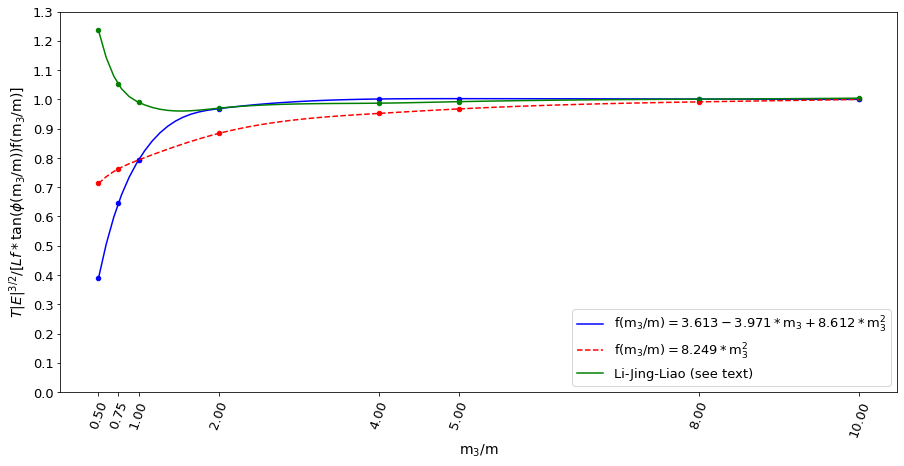

In [98]:
from scipy.interpolate import BSpline, make_interp_spline
x_new = np.linspace(0.5, 10, 100)
masses = sorted(df['Class'].unique())

# Veljko const
df['Const_man'] = df['T*'].astype(float)/(df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.06+np.power(df['Class'],2))))))
df['Const_man'] = df['Const_man']/(3.613048644916136 - 3.97102867585619*df['Class']  + 8.612460756414029*df['Class']**2) # 3.613048644916136` - 3.97102867585619` x + 8.612460756414029` x^2



lines = df.groupby(by=['Class'])['Const_man'].mean()
lines = list(lines)


# Div m3^2
df['Const_2m'] = df['T*'].astype(float)/(df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.06+np.power(df['Class'],2))))))
df['Const_2m'] = df['Const_2m']/df['Class']**2 

lines_2m = df.groupby(by=['Class'])['Const_2m'].mean()
lines_2m = list(lines_2m)

# Chinese const
df['Const_ch'] = df['T*'].astype(float)/(df['Lf'].astype(int)*(df['Class']*3.074 - 0.617))

lines_ch = df.groupby(by=['Class'])['Const_ch'].mean()
lines_ch = list(lines_ch)

# Normalize data
normal_array = np.true_divide(lines_2m, max(lines_2m)) #preprocessing.normalize([lines_2m])
chineese_array =  lines_ch

# Interpolate datapoints

a_BSpline = make_interp_spline(masses, lines)
y_new = a_BSpline(x_new)

a_BSpline_man = make_interp_spline(masses, normal_array)
y_man = a_BSpline_man(x_new)

a_BSpline_ch = make_interp_spline(masses, chineese_array)
y_ch = a_BSpline_ch(x_new)



plt.figure(figsize=(15,7))

plt.scatter(masses, normal_array, color='red', s=20)
plt.scatter(masses, lines, color='blue', s=20)
plt.scatter(masses, chineese_array, color='green', s=20)
plt.plot(x_new, y_new, 'b-', label=r'$\mathrm{f}(\mathrm{m}_{3}/\mathrm{m})= 3.613 - 3.971*\mathrm{m}_3+ 8.612*\mathrm{m}_3^{2}$')
plt.plot(x_new, y_man, 'r--', label=r'$\mathrm{f}(\mathrm{m}_{3}/\mathrm{m})= 8.249*\mathrm{m}_{3}^{2}$')
plt.plot(x_new, y_ch, 'g-', label='Li-Jing-Liao (see text)')

plt.xlabel(r'$\mathrm{m}_{3}/\mathrm{m}$',fontsize=14)
plt.ylabel(r'$T|E|^{3/2}/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m})) \mathrm{f}(\mathrm{m}_{3}/\mathrm{m})]$',fontsize=14)
plt.xticks(df['Class'].unique(), rotation=70)
plt.yticks(np.arange(0,1.31, 0.1))
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(fontsize=13, loc=4)
plt.show()

In [99]:
df['Const_ch'] = df['T*'].astype(float)/(df['Lf'].astype(int)*(df['Class']*(3.074) - 0.617))

lines_ch = df.groupby(by=['Class'])['Const_ch'].mean()
lines_ch = list(lines_ch)
print(lines_ch)

[1.2357849480426224, 1.0507994256847715, 0.9900544228996894, 0.9697819245238428, 0.9869552865071197, 0.9920862202066922, 1.0007517018487173, 1.0041127181813558]


C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$T|E|^{3/2}/[Lf*\\mathrm{tan}(\\phi(\\mathrm{m}_{3}/\\mathrm{m}))\\mathrm{m}_{3}^{2}]$')

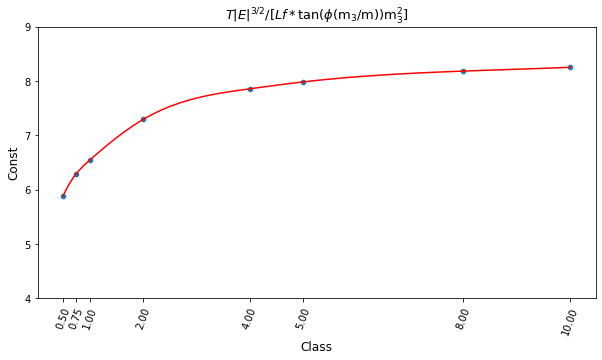

In [100]:
from scipy.interpolate import BSpline, make_interp_spline
x_new = np.linspace(0.5, 10, 100)
lines = df.groupby(by=['Class'])['Const_2m'].mean()
lines = list(lines)
masses = sorted(df['Class'].unique())

a_BSpline = make_interp_spline(masses, lines)
y_new = a_BSpline(x_new)

plt.figure(figsize=(10,5))
sns.scatterplot(masses, lines)
sns.lineplot(x_new, y_new,color='red')
plt.xlabel('Class',fontsize=12)
plt.ylabel('Const',fontsize=12)
plt.xticks(df['Class'].unique(), rotation=70)
plt.yticks(np.arange(4,10))
plt.title(r'$T|E|^{3/2}/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m}))\mathrm{m}_{3}^{2}]$', fontsize=13)

In [101]:
lines = df.groupby(by=['Class'])['Const_2m'].mean()
lines = list(lines)

norm = np.linalg.norm(lines)
normal_array = lines/norm
print(normal_array)

[0.28339016 0.30334316 0.31527538 0.35134633 0.37855115 0.38466725
 0.39425449 0.39764767]


C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$T|E|^{3/2}/[Lf*\\mathrm{tan}(\\phi(\\mathrm{m}_{3}/\\mathrm{m}))\\mathrm{m}_{3}^{2}]$')

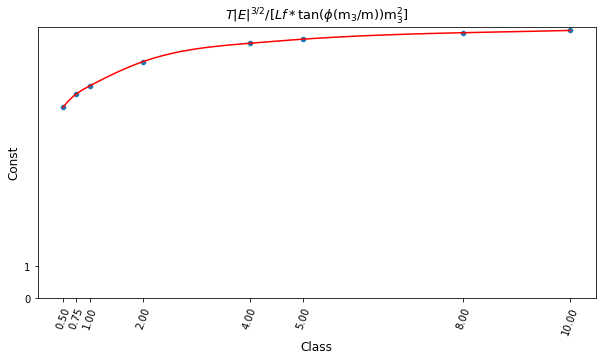

In [102]:
from scipy.interpolate import BSpline, make_interp_spline
X_new = np.linspace(0.5, 10, 100)
lines = df.groupby(by=['Class'])['Const_2m'].mean()
lines = list(lines)
Masses = sorted(df['Class'].unique())

a_BSpline = make_interp_spline(masses, lines)
y_new = a_BSpline(x_new)

plt.figure(figsize=(10,5))
sns.scatterplot(masses, lines)
sns.lineplot(x_new, y_new,color='red')
plt.xlabel('Class',fontsize=12)
plt.ylabel('Const',fontsize=12)
plt.xticks(df['Class'].unique(), rotation=70)
plt.yticks(np.arange(0,2))
plt.title(r'$T|E|^{3/2}/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m}))\mathrm{m}_{3}^{2}]$', fontsize=13)

In [103]:
lines = df.groupby(by=['Class'])['Const_2m'].mean()
list(lines)

[5.880390662777035,
 6.294418572534418,
 6.542014059629523,
 7.290491962774922,
 7.854996311732997,
 7.981906309444698,
 8.180842997497134,
 8.251252183584258]

In [104]:
df['Const_2m'] = df['T*'].astype(float)/(df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.01+np.power(df['Class'],2))))))
df['Const_2m'] = df['Const_2m']/(0+0*df['Class']+3*df['Class']**2 + 14*df['Class']**3)

In [105]:
lines = df.groupby(by=['Class'])['Const_2m'].mean()
list(lines)

[0.5197639714990826,
 0.4440119891667197,
 0.374803674293165,
 0.23369189219711262,
 0.13292696001952603,
 0.10923165727817669,
 0.07110995874838592,
 0.05768663288859821]

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '$T|E|^{3/2}/[Lf*\\mathrm{tan}(\\phi(\\mathrm{m}_{3}/\\mathrm{m}))\\mathrm{m}_{3}^{2}]$')

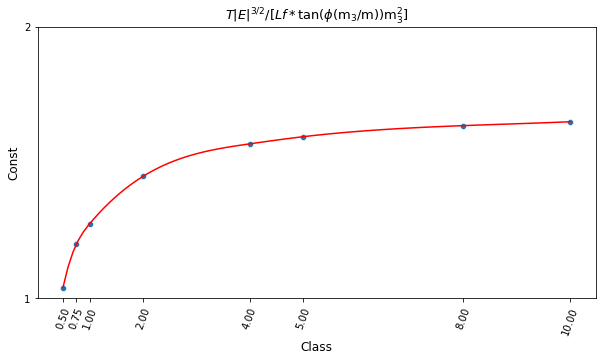

In [106]:
from scipy.interpolate import BSpline, make_interp_spline
df['Const_2m'] = df['T*'].astype(float)/(df['Lf'].astype(int)*np.tan(np.radians(21/(np.sqrt(0.01+np.power(df['Class'],2))))))
df['Const_2m'] = df['Const_2m']/(0+0*df['Class']+5*df['Class']**2)

x_new = np.linspace(0.5, 10, 100)
lines = df.groupby(by=['Class'])['Const_2m'].mean()
lines = list(lines)
masses = sorted(df['Class'].unique())

a_BSpline = make_interp_spline(masses, lines)
y_new = a_BSpline(x_new)

plt.figure(figsize=(10,5))
sns.scatterplot(masses, lines)
sns.lineplot(x_new, y_new,color='red')
plt.xlabel('Class',fontsize=12)
plt.ylabel('Const',fontsize=12)
plt.xticks(df['Class'].unique(), rotation=70)
plt.yticks(np.arange(1,3))
plt.title(r'$T|E|^{3/2}/[Lf*\mathrm{tan}(\phi(\mathrm{m}_{3}/\mathrm{m}))\mathrm{m}_{3}^{2}]$', fontsize=13)

# Fitovanje pravih

In [107]:
df = pd.read_csv('finalnaTabela.csv')
#df.drop(columns=['Unnamed: 0', 'Index'], inplace=True)
#df.to_csv('finalnaTabela.csv',index=False)
df

Class  SubClass        v1        v2           T       T*   Lf Stability  \
0       0.5       A.1  0.286924  0.079185    4.176129    4.538    4         U   
1       0.5       A.1  0.342031  0.180937   13.915334    9.063    8         U   
2       0.5       A.1  0.369772  0.191007   25.944195   13.095   12         U   
3       0.5       A.1  0.200966  0.243108   19.013416   19.086   16         U   
4       0.5       A.1  0.261324  0.235624   28.435858   23.513   20         U   
...     ...       ...       ...       ...         ...      ...  ...       ...   
2009    1.0  II.C-298  0.246125  0.245698  191.022662  596.818  240       NaN   
2010    1.0  II.C-299  0.247004  0.243706  197.186956  616.780  248       NaN   
2011    1.0  II.C-300  0.325938  0.114488  198.692018  622.874  250       NaN   
2012    1.0  II.C-301  0.325938  0.114488  198.692018  622.874  250       NaN   
2013    1.0  II.C-302  0.325938  0.114488  198.692018  622.874  250       NaN   

            mi                 Slova  
0     0.315879                  BabA  
1      1.97222              BaBabAbA  
2     2.314004          BaBaBabAbAbA  
3     6.927685      BaBAbaBabAbaBAbA  
4     1.109487  BaBAbAbaBabAbaBaBAbA  
...        ...                   ...  
2009       NaN                   NaN  
2010       NaN                   NaN  
2011       NaN                   NaN  
2012       NaN                   NaN  
2013       NaN                   NaN  

[2014 rows x 10 columns]

In [108]:
df['SubClass'] = df['SubClass'].apply(lambda x: x.split('-')[0])
df

Class SubClass        v1        v2           T       T*   Lf Stability  \
0       0.5      A.1  0.286924  0.079185    4.176129    4.538    4         U   
1       0.5      A.1  0.342031  0.180937   13.915334    9.063    8         U   
2       0.5      A.1  0.369772  0.191007   25.944195   13.095   12         U   
3       0.5      A.1  0.200966  0.243108   19.013416   19.086   16         U   
4       0.5      A.1  0.261324  0.235624   28.435858   23.513   20         U   
...     ...      ...       ...       ...         ...      ...  ...       ...   
2009    1.0     II.C  0.246125  0.245698  191.022662  596.818  240       NaN   
2010    1.0     II.C  0.247004  0.243706  197.186956  616.780  248       NaN   
2011    1.0     II.C  0.325938  0.114488  198.692018  622.874  250       NaN   
2012    1.0     II.C  0.325938  0.114488  198.692018  622.874  250       NaN   
2013    1.0     II.C  0.325938  0.114488  198.692018  622.874  250       NaN   

            mi                 Slova  
0     0.315879                  BabA  
1      1.97222              BaBabAbA  
2     2.314004          BaBaBabAbAbA  
3     6.927685      BaBAbaBabAbaBAbA  
4     1.109487  BaBAbAbaBabAbaBaBAbA  
...        ...                   ...  
2009       NaN                   NaN  
2010       NaN                   NaN  
2011       NaN                   NaN  
2012       NaN                   NaN  
2013       NaN                   NaN  

[2014 rows x 10 columns]

In [109]:
df['Class'] = df['Class'].astype(str)

4.538
302.17


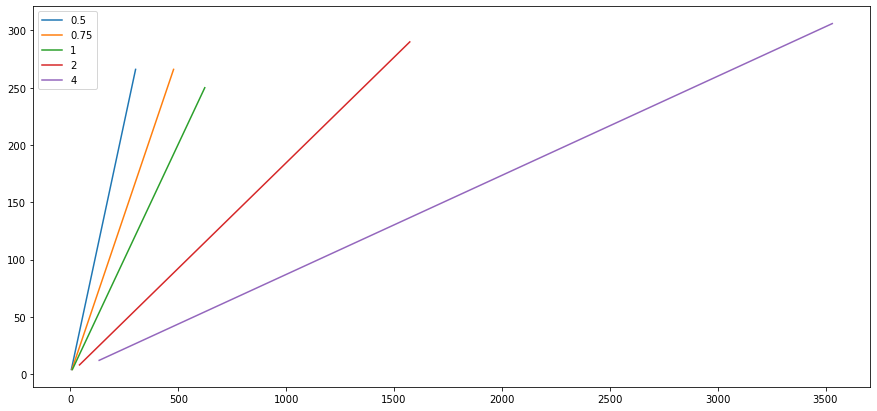

In [110]:
print(df[df['Class'].isin(['0.5'])]['T*'].min())
print(df[df['Class'].isin(['0.5'])]['T*'].max())

plt.figure(figsize=(15,7))
plt.plot([df[df['Class'].isin(['0.5'])]['T*'].min(), df[df['Class'].isin(['0.5'])]['T*'].max()], [df[df['Class'].isin(['0.5'])]['Lf'].min(), df[df['Class'].isin(['0.5'])]['Lf'].max()], label='0.5')
plt.plot([df[df['Class'].isin(['0.75'])]['T*'].min(), df[df['Class'].isin(['0.75'])]['T*'].max()], [df[df['Class'].isin(['0.75'])]['Lf'].min(), df[df['Class'].isin(['0.75'])]['Lf'].max()], label='0.75')
plt.plot([df[df['Class'].isin(['1.0'])]['T*'].min(), df[df['Class'].isin(['1.0'])]['T*'].max()], [df[df['Class'].isin(['1.0'])]['Lf'].min(), df[df['Class'].isin(['1.0'])]['Lf'].max()], label='1')
plt.plot([df[df['Class'].isin(['2.0'])]['T*'].min(), df[df['Class'].isin(['2.0'])]['T*'].max()], [df[df['Class'].isin(['2.0'])]['Lf'].min(), df[df['Class'].isin(['2.0'])]['Lf'].max()], label='2')
plt.plot([df[df['Class'].isin(['4.0'])]['T*'].min(), df[df['Class'].isin(['4.0'])]['T*'].max()], [df[df['Class'].isin(['4.0'])]['Lf'].min(), df[df['Class'].isin(['4.0'])]['Lf'].max()], label='4')
plt.legend()

### Racunanje uglova izmedju pravih

In [111]:
from scipy.stats import linregress
import math
slope_05, intercept05, r, p, se = linregress([df[df['Class'].isin(['0.5'])]['T*'].min(), df[df['Class'].isin(['0.5'])]['T*'].max()], [df[df['Class'].isin(['0.5'])]['Lf'].min(), df[df['Class'].isin(['0.5'])]['Lf'].max()])
slope_075, intercept075, r, p, se = linregress([df[df['Class'].isin(['0.75'])]['T*'].min(), df[df['Class'].isin(['0.75'])]['T*'].max()], [df[df['Class'].isin(['0.75'])]['Lf'].min(), df[df['Class'].isin(['0.75'])]['Lf'].max()])
slope_1, intercept1, r, p, se = linregress([df[df['Class'].isin(['1.0'])]['T*'].min(), df[df['Class'].isin(['1.0'])]['T*'].max()], [df[df['Class'].isin(['1.0'])]['Lf'].min(), df[df['Class'].isin(['1.0'])]['Lf'].max()])
slope_2, intercept2, r, p, se = linregress([df[df['Class'].isin(['2.0'])]['T*'].min(), df[df['Class'].isin(['2.0'])]['T*'].max()], [df[df['Class'].isin(['2.0'])]['Lf'].min(), df[df['Class'].isin(['2.0'])]['Lf'].max()])
slope_4, intercept4, r, p, se = linregress([df[df['Class'].isin(['4.0'])]['T*'].min(), df[df['Class'].isin(['4.0'])]['T*'].max()], [df[df['Class'].isin(['4.0'])]['Lf'].min(), df[df['Class'].isin(['4.0'])]['Lf'].max()])
slope_5, intercept5, r, p, se = linregress([df[df['Class'].isin(['5.0'])]['T*'].min(), df[df['Class'].isin(['5.0'])]['T*'].max()], [df[df['Class'].isin(['5.0'])]['Lf'].min(), df[df['Class'].isin(['5.0'])]['Lf'].max()])
slope_8, intercept8, r, p, se = linregress([df[df['Class'].isin(['8.0'])]['T*'].min(), df[df['Class'].isin(['8.0'])]['T*'].max()], [df[df['Class'].isin(['8.0'])]['Lf'].min(), df[df['Class'].isin(['8.0'])]['Lf'].max()])
slope_10, intercept10, r, p, se = linregress([df[df['Class'].isin(['10.0'])]['T*'].min(), df[df['Class'].isin(['10.0'])]['T*'].max()], [df[df['Class'].isin(['10.0'])]['Lf'].min(), df[df['Class'].isin(['10.0'])]['Lf'].max()])


angle_in_radians05 = math.atan(slope_05)
angle_in_degrees05 = math.degrees(angle_in_radians05)
print("Angle is: {}".format(angle_in_degrees05))

angle_in_radians075 = math.atan(slope_075)
angle_in_degrees075 = math.degrees(angle_in_radians075)
print("Angle is: {}".format(angle_in_degrees075))

angle_in_radians1 = math.atan(slope_1)
angle_in_degrees1 = math.degrees(angle_in_radians1)
print("Angle is: {}".format(angle_in_degrees1))

angle_in_radians2 = math.atan(slope_2)
angle_in_degrees2 = math.degrees(angle_in_radians2)
print("Angle is: {}".format(angle_in_degrees2))

angle_in_radians4 = math.atan(slope_4)
angle_in_degrees4 = math.degrees(angle_in_radians4)
print("Angle is: {}".format(angle_in_degrees4))

angle_in_radians5 = math.atan(slope_5)
angle_in_degrees5 = math.degrees(angle_in_radians5)
print("Angle is: {}".format(angle_in_degrees5))

angle_in_radians8 = math.atan(slope_8)
angle_in_degrees8 = math.degrees(angle_in_radians8)
print("Angle is: {}".format(angle_in_degrees8))

angle_in_radians10 = math.atan(slope_10)
angle_in_degrees10 = math.degrees(angle_in_radians10)
print("Angle is: {}".format(angle_in_degrees10))


print("Angle between 1 and 2 is: ", angle_in_degrees1-angle_in_degrees2)

print("Angle between 1 and 2 is: ", angle_in_degrees1-angle_in_degrees2)

print("Angle between 2 and 4 is: ", angle_in_degrees2-angle_in_degrees4)

print("Angle between 4 and 8 is: ", angle_in_degrees4-angle_in_degrees8)

print("Angle between 8 and 10 is: ", angle_in_degrees8-angle_in_degrees10)


Angle is: 41.35687178779396
Angle is: 29.072614631815256
Angle is: 21.845312563140318
Angle is: 10.436756185171566
Angle is: 4.9450733946298
Angle is: 3.9070686399605843
Angle is: 2.386491550356325
Angle is: 1.8937048365918563
Angle between 1 and 2 is:  11.408556377968752
Angle between 1 and 2 is:  11.408556377968752
Angle between 2 and 4 is:  5.491682790541766
Angle between 4 and 8 is:  2.558581844273475
Angle between 8 and 10 is:  0.4927867137644686


### Grafik uglova i masa

[0.5, 0.75, 1.0, 2.0, 4.0, 5.0, 8.0, 10.0]


Text(0, 0.5, 'Angle in degrees')

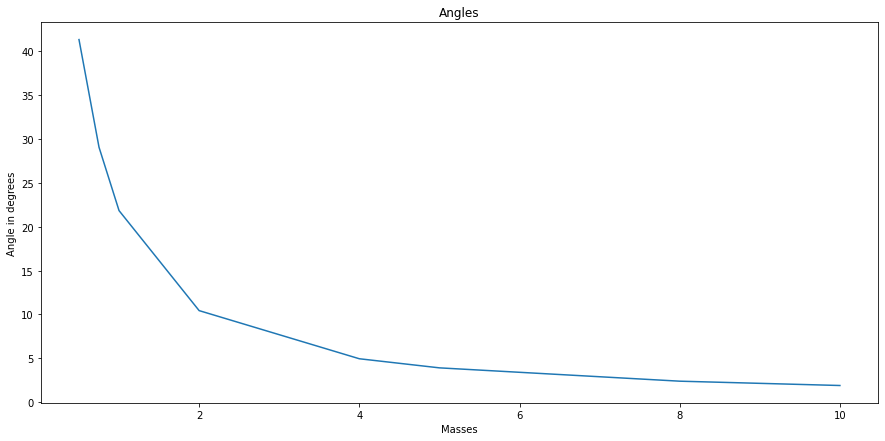

In [112]:
angle_list = [angle_in_degrees05, angle_in_degrees075, angle_in_degrees1, angle_in_degrees2, angle_in_degrees4, angle_in_degrees5, angle_in_degrees8, angle_in_degrees10]
masses = sorted([float(k) for k in df['Class'].unique()])

print(masses)
plt.figure(figsize=(15,7))
plt.plot(masses, angle_list)
plt.title('Angles')
plt.xlabel('Masses')
plt.ylabel('Angle in degrees')


In [113]:
from scipy.interpolate import BSpline, make_interp_spline
x_new = np.linspace(1, 10, 100)
a_BSpline = make_interp_spline(masses, angle_list)
y_new = a_BSpline(x_new)

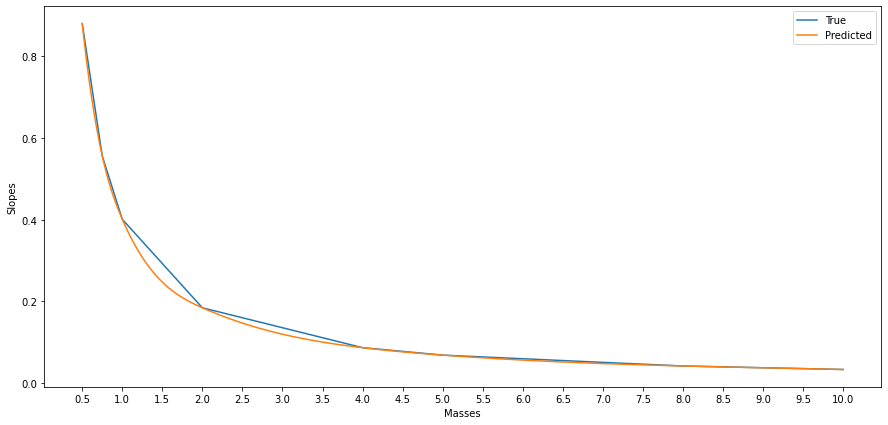

In [114]:
from scipy.interpolate import BSpline, make_interp_spline

angle_list = [slope_05, slope_075, slope_1, slope_2, slope_4, slope_5, slope_8, slope_10]
masses = sorted([float(k) for k in df['Class'].unique()])

x_new = np.linspace(masses[0], masses[-1], 950)
x_new = [round(x, 2) for x in x_new]
a_BSpline = make_interp_spline(masses, angle_list)
y_new = a_BSpline(x_new)


plt.figure(figsize=(15,7))
plt.plot(masses, angle_list, label='True')
plt.plot(x_new, y_new, label='Predicted')
plt.xlabel('Masses')
plt.ylabel('Slopes')
plt.xticks(np.arange(0.5, 10.5, 0.5))
plt.legend()

slopes = dict(zip(x_new, y_new))


In [115]:
print(intercept1)
print(intercept8)
print(intercept1-intercept05)
intercepts = np.linspace(0.0067, 0.3, 950)[::-1]
#intercepts =  [round(x, 2) for x in intercepts]

0.29658624982889137
0.006725372222206261
0.2913045596880579


In [116]:
intercepts = dict(zip(x_new, intercepts))

In [117]:
intercepts

{0.5: 0.3,
 0.51: 0.29969093782929396,
 0.52: 0.299381875658588,
 0.53: 0.29907281348788195,
 0.54: 0.298763751317176,
 0.55: 0.29845468914646994,
 0.56: 0.29814562697576397,
 0.57: 0.29783656480505794,
 0.58: 0.29752750263435196,
 0.59: 0.2972184404636459,
 0.6: 0.29690937829293995,
 0.61: 0.2966003161222339,
 0.62: 0.2962912539515279,
 0.63: 0.2959821917808219,
 0.64: 0.2956731296101159,
 0.65: 0.2953640674394099,
 0.66: 0.2950550052687039,
 0.67: 0.2947459430979979,
 0.68: 0.29443688092729187,
 0.69: 0.2941278187565859,
 0.7: 0.29381875658587986,
 0.71: 0.2935096944151739,
 0.72: 0.29320063224446785,
 0.73: 0.2928915700737618,
 0.74: 0.29258250790305584,
 0.75: 0.2922734457323498,
 0.76: 0.29196438356164384,
 0.77: 0.2916553213909378,
 0.78: 0.29134625922023183,
 0.79: 0.2910371970495258,
 0.8: 0.2907281348788198,
 0.81: 0.2904190727081138,
 0.82: 0.29011001053740776,
 0.83: 0.2898009483667018,
 0.84: 0.28949188619599575,
 0.85: 0.2891828240252898,
 0.86: 0.28887376185458374,
 0.87:

In [118]:
slopes

{0.5: 0.8802816901408451,
 0.51: 0.8624681413182873,
 0.52: 0.8451202628898501,
 0.53: 0.8282299343782192,
 0.54: 0.8117890353060807,
 0.55: 0.7957894451961202,
 0.56: 0.7802230435710236,
 0.57: 0.7650817099534768,
 0.58: 0.7503573238661654,
 0.59: 0.7360417648317755,
 0.6: 0.7221269123729928,
 0.61: 0.708604646012503,
 0.62: 0.695466845272992,
 0.63: 0.6827053896771457,
 0.64: 0.6703121587476498,
 0.65: 0.6582790320071903,
 0.66: 0.6465978889784527,
 0.67: 0.6352606091841232,
 0.68: 0.6242590721468876,
 0.69: 0.6135851573894316,
 0.7: 0.6032307444344409,
 0.71: 0.5931877128046014,
 0.72: 0.5834479420225989,
 0.73: 0.5740033116111193,
 0.74: 0.5648457010928485,
 0.75: 0.5559669899904722,
 0.76: 0.547359057826676,
 0.77: 0.5390137841241464,
 0.78: 0.5309230484055684,
 0.79: 0.5230787301936284,
 0.8: 0.5154727090110122,
 0.81: 0.5080968643804051,
 0.82: 0.5009430758244936,
 0.83: 0.494003222865963,
 0.84: 0.48726918502749955,
 0.85: 0.4807328418317886,
 0.86: 0.4743860728015164,
 0.87: 0

In [119]:
def abline_y(slope, intercept, label):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    axes.set_xlim(0, 10000)
    axes.set_ylim(0, 350)
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    #plt.plot(x_vals, y_vals, linewidth=2, label=label)
    return x_vals

def abline(slope, intercept, label):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    axes.set_xlim(0, 10000)
    axes.set_ylim(0, 350)
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, linewidth=2, label=label)

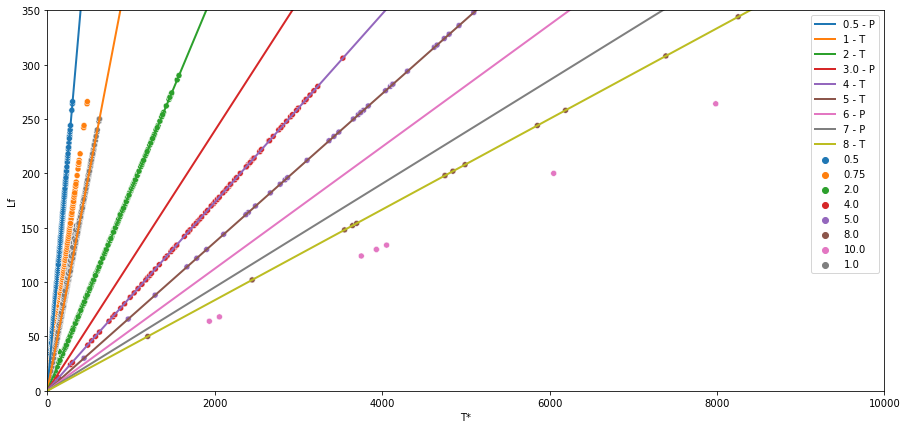

In [120]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'T*', y = 'Lf', data = df, hue='Class')
abline(slopes[0.5], intercepts[0.5], '0.5 - P')

abline(slope_1, intercept1, '1 - T')

abline(slope_2, intercept2, '2 - T')

abline(slopes[3.0], intercepts[3.0], '3.0 - P')

abline(slope_4, intercept4, '4 - T')

abline(slope_5, intercept5, '5 - T')

abline(slopes[6.0], intercepts[6.0], '6 - P')

abline(slopes[7.0], intercepts[7.0], '7 - P')


abline(slope_8, intercept8, '8 - T')

plt.legend()

In [121]:
coeff = np.polyfit(np.log(x_new), list(slopes.values()), 2)
def find_slope(x, coeff):
    return coeff[0] * np.log(x)+  coeff[1]

slope05 = find_slope(0.5, coeff)
print(slope05)
print(slope_05)

-0.46892565414945686
0.8802816901408451


In [122]:
import scipy
scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  x_new,  list(slopes.values()))
print(0.36664986 - -0.17068412*np.log(0.51))

0.251720637469381


## Predikcija za masu m3=3

Angle is: 7.708712673336993
0.2414150552102683
0.4563934136759258


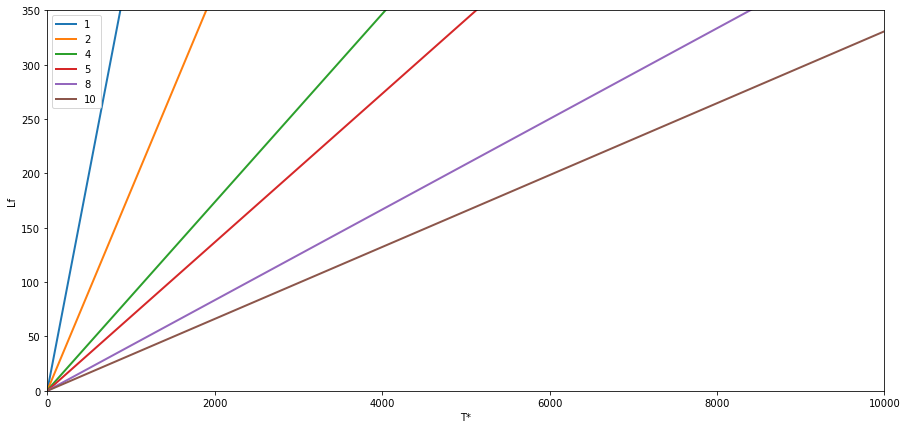

In [123]:
slope1 = slope_1
intercept = 0.3456

slope_3 = (slope_4-slope_2)/2 + slope_2
angle_in_radians3 = math.atan(slope_3)
angle_in_degrees3 = math.degrees(angle_in_radians3)
print("Angle is: {}".format(angle_in_degrees3))
print(intercept2)
print(intercept4)

    
plt.figure(figsize=(15,7))

#abline(slope_05, intercept05, '0.5')
abline(slope_1, intercept1, '1')
abline(slope_2, intercept2, '2')
#abline(slope_3, intercept, '3')
abline(slope_4, intercept4, '4')
abline(slope_5, intercept5, '5')
abline(slope_8, intercept8, '8')
abline(slope_10, intercept10, '10')
plt.xlabel('T*')
plt.ylabel('Lf')

plt.legend()

Angle is: 29.27876733656582
0.0052816901408334616
0.29658624982889137


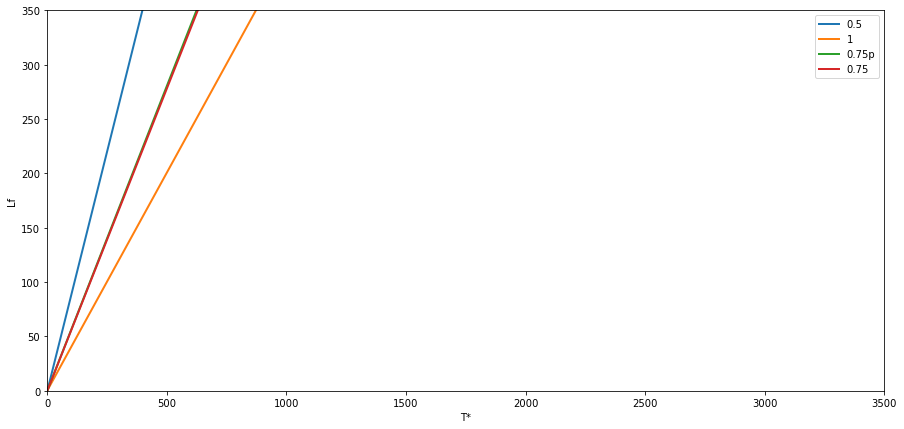

In [124]:
#slope05 = slope_05
intercept = 0.14236

slope_75 = (slope_05-slope_1)/3 + slope_1

angle_in_radians75 = math.atan(slope_75)
angle_in_degrees75 = math.degrees(angle_in_radians75)
print("Angle is: {}".format(angle_in_degrees75))
print(intercept05)
print(intercept1)
def abline(slope, intercept, label):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    axes.set_xlim(0, 3500)
    axes.set_ylim(0, 350)
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, linewidth=2, label=label)
    
plt.figure(figsize=(15,7))
abline(slope_05, intercept05, '0.5')
abline(slope_1, intercept1, '1')
abline(slope_75, intercept, '0.75p')
abline(slope_075, intercept075, '0.75')
plt.xlabel('T*')
plt.ylabel('Lf')

plt.legend()

In [125]:
intercept1 

for i in [x / 10.0 for x in range(5, 105, 5)]:
    print(i)
slope_75 = 2*(slope_05-slope_1)/3
print(slope_75)

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
0.31959504245868636


In [126]:
slope_75 = (slope_05-slope_1)/4 + slope_1
print(slope_75)
print(slope_075)

0.520737267374823
0.5559669899904721


# Analiza v1 i v2

Text(0.5, 1.0, 'v1 in function of Lf')

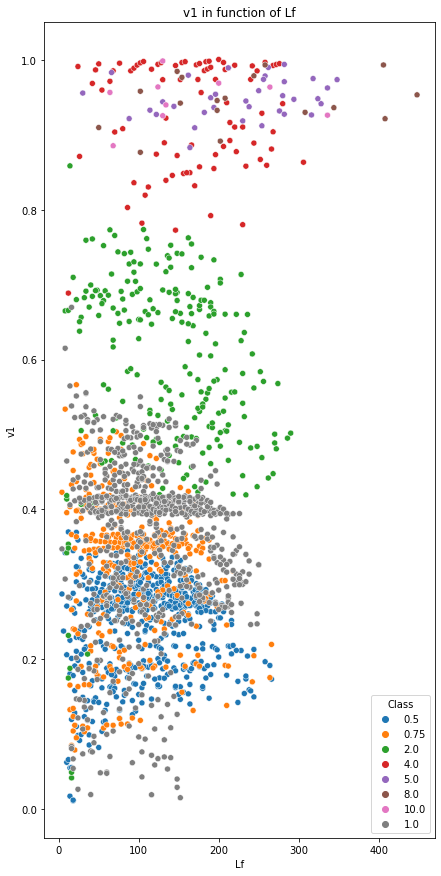

In [127]:
plt.figure(figsize=(7,15))
sns.scatterplot(x = 'Lf', y = 'v1', data = df, hue='Class')
plt.title('v1 in function of Lf')

In [128]:
v1_mean = df.groupby(by=('Class'), as_index=False)['v1'].mean()
v1_mean['Class'] = v1_mean['Class'].apply(lambda x: float(x))
v1_mean


Class        v1
0   0.50  0.249279
1   0.75  0.329733
2   1.00  0.355206
3  10.00  0.947657
4   2.00  0.583440
5   4.00  0.925689
6   5.00  0.948584
7   8.00  0.945509

Text(0.5, 1.0, 'Mean of v1 arranged by different masses')

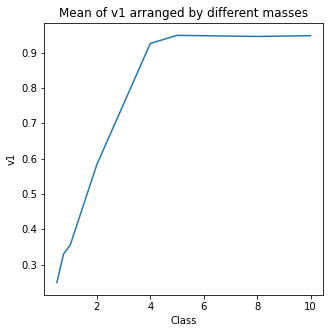

In [129]:
plt.figure(figsize=(5,5))
sns.lineplot(x = 'Class', y = 'v1', data = v1_mean)
plt.title('Mean of v1 arranged by different masses')

In [130]:
v2_mean = df.groupby(by=('Class'), as_index=False)['v2'].mean()
v2_mean['Class'] = v2_mean['Class'].apply(lambda x: float(x))
v2_mean


Class        v2
0   0.50  0.080148
1   0.75  0.185380
2   1.00  0.330273
3  10.00  0.570512
4   2.00  0.412926
5   4.00  0.699954
6   5.00  0.724408
7   8.00  0.788948

Text(0.5, 1.0, 'Mean of v2 arranged by different masses')

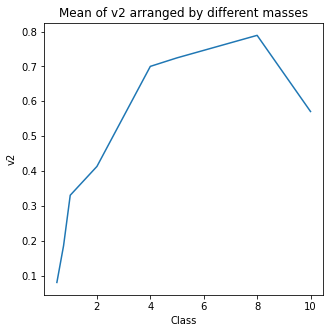

In [131]:
plt.figure(figsize=(5,5))
sns.lineplot(x = 'Class', y = 'v2', data = v2_mean)
plt.title('Mean of v2 arranged by different masses')

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


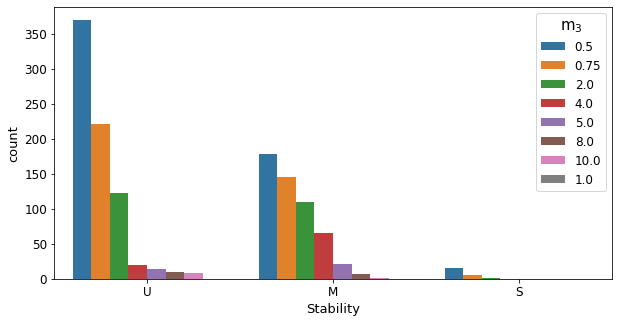

In [132]:
plt.figure(figsize=(10,5))
plot = sns.countplot(df['Stability'], hue=df['Class'])

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Stability', fontsize=13)
plt.ylabel('count',fontsize=13)
plt.legend(title=r'$\mathrm{m}_{3}$', loc='upper right',fontsize='12')
plt.setp(plot.get_legend().get_title(), fontsize='15') # for legend title
plt.show()

### Bogdan picture

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


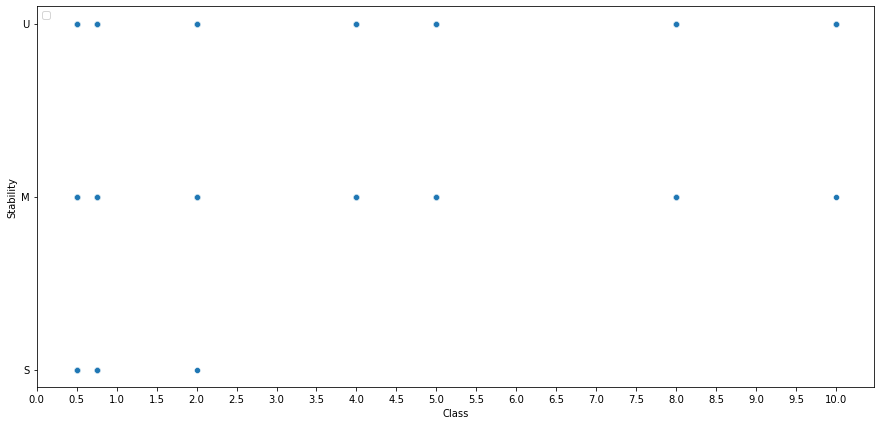

In [133]:
df['Class'] = df['Class'].astype(float)
plt.figure(figsize=(15,7))
sns.scatterplot(df['Class'], df['Stability'])

plt.xticks(np.arange(0, 10.5, 0.5))
plt.legend(loc='upper left')
df['Class'] = df['Class'].astype(str)

In [134]:
df['Stability'].value_counts()

U    765
M    529
S     23
Name: Stability, dtype: int64

C:\Users\Pc4y\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


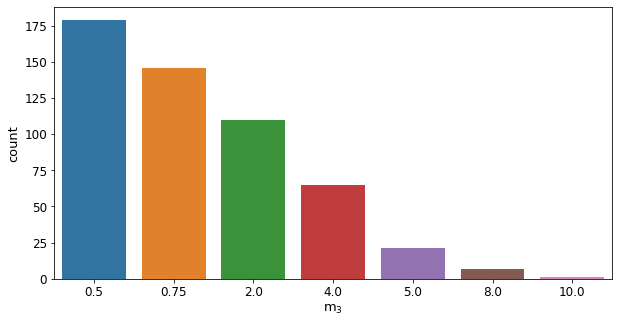

In [135]:
plt.figure(figsize=(10,5))
sns.countplot(df[df['Stability']=='M']['Class'])

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel(r'$\mathrm{m}_{3}$', fontsize=13)
plt.ylabel('count',fontsize=13)
plt.show()

In [136]:
df[df['Stability']=='M']['Class'].value_counts()

0.5     179
0.75    146
2.0     110
4.0      65
5.0      21
8.0       7
10.0      1
Name: Class, dtype: int64

In [137]:
df[df['Stability']=='S']['Class'].value_counts()

0.5     16
0.75     6
2.0      1
Name: Class, dtype: int64

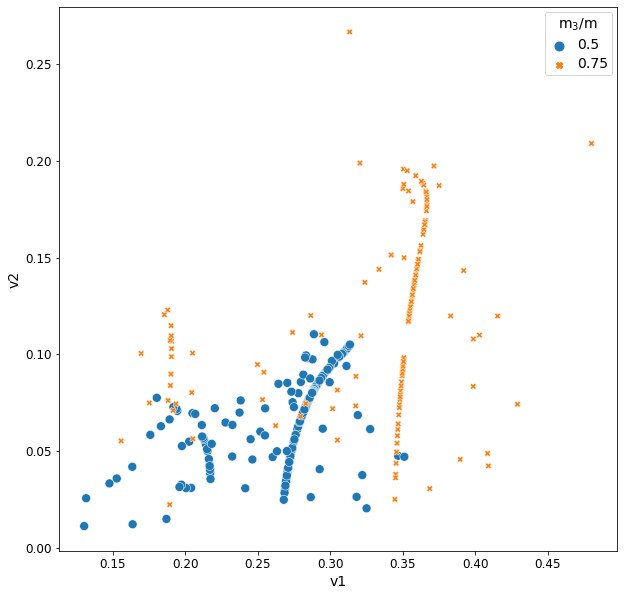

In [182]:
plt.figure(figsize=(10,10))
plot = sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5','0.75']))], hue='Class', style='Class', size='Class',sizes=(40, 80))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=14)
plt.ylabel('v2', fontsize=14)
plt.legend(title=r'$\mathrm{m}_{3}/\mathrm{m}$') # for legend title
plt.setp(plot.get_legend().get_title(), fontsize='14')
plt.setp(plot.get_legend().get_texts(), fontsize='14')
plt.show()

<AxesSubplot:xlabel='v1', ylabel='v2'>

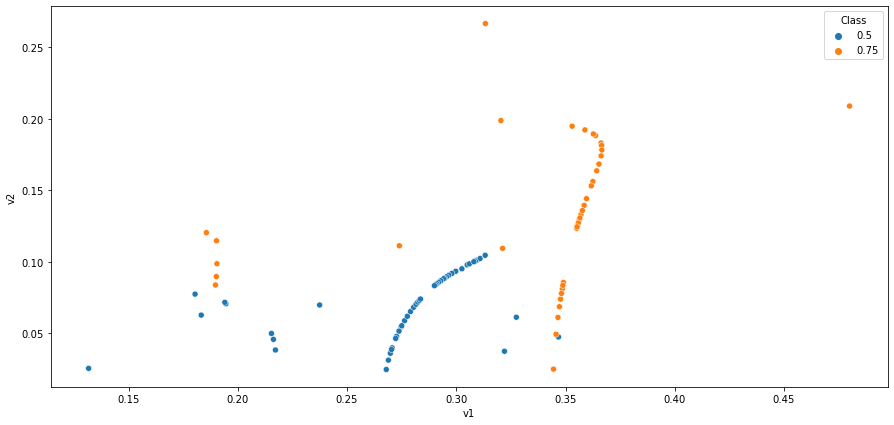

In [139]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5','0.75'])) & (data['Lf']<90)], hue='Class')

<AxesSubplot:xlabel='v1', ylabel='v2'>

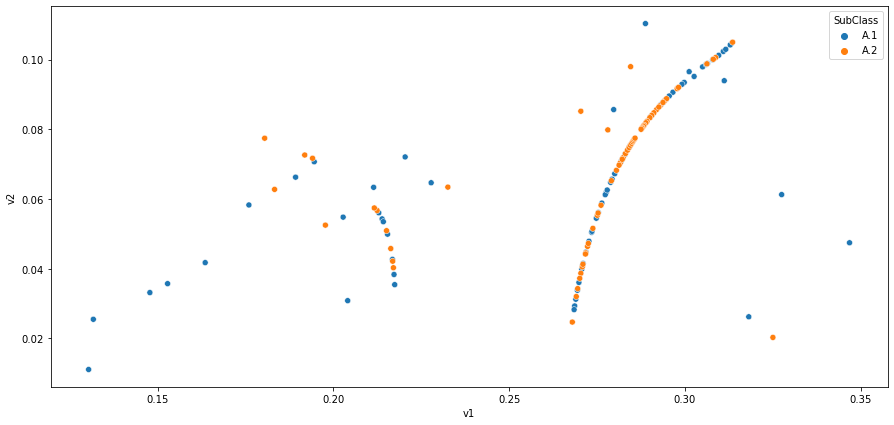

In [140]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1', 'A.2']))], hue='SubClass')

<AxesSubplot:xlabel='v1', ylabel='v2'>

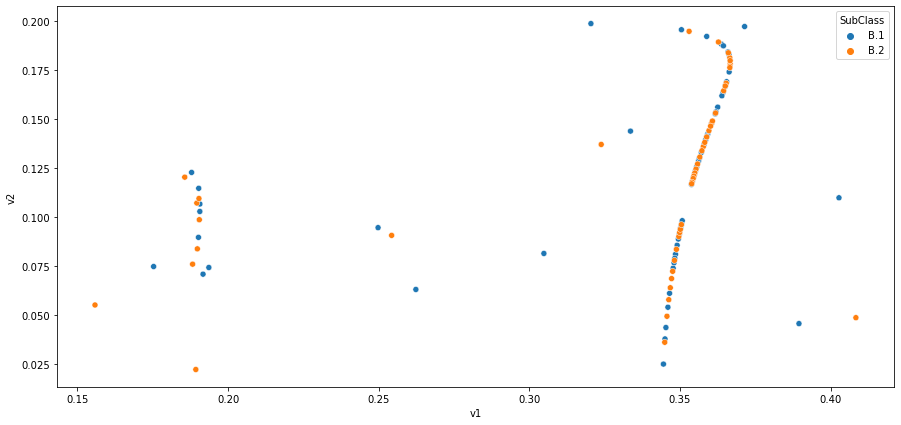

In [141]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.75'])) & (data['SubClass'].isin(['B.1', 'B.2']))], hue='SubClass')

<AxesSubplot:xlabel='v1', ylabel='v2'>

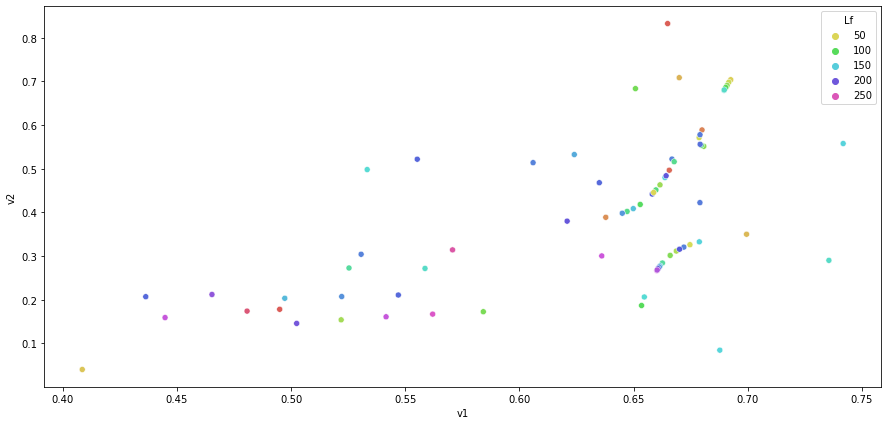

In [142]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['2'])) & (data['SubClass'].isin(['C.1', 'C.2']))], hue='Lf', palette='hls')

<AxesSubplot:xlabel='v1', ylabel='v2'>

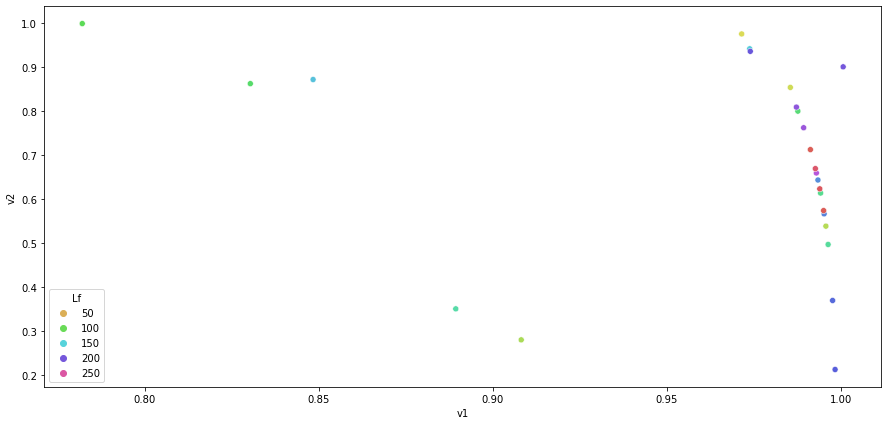

In [143]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['4'])) & (data['SubClass'].isin(['D.1']))], hue='Lf', palette='hls')

<AxesSubplot:xlabel='v1', ylabel='v2'>

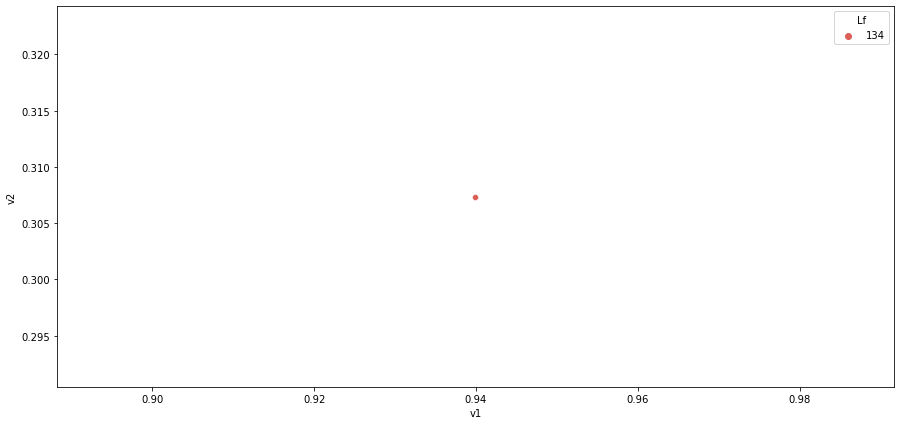

In [144]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['10']))], hue='Lf', palette='hls')

<AxesSubplot:xlabel='v1', ylabel='v2'>

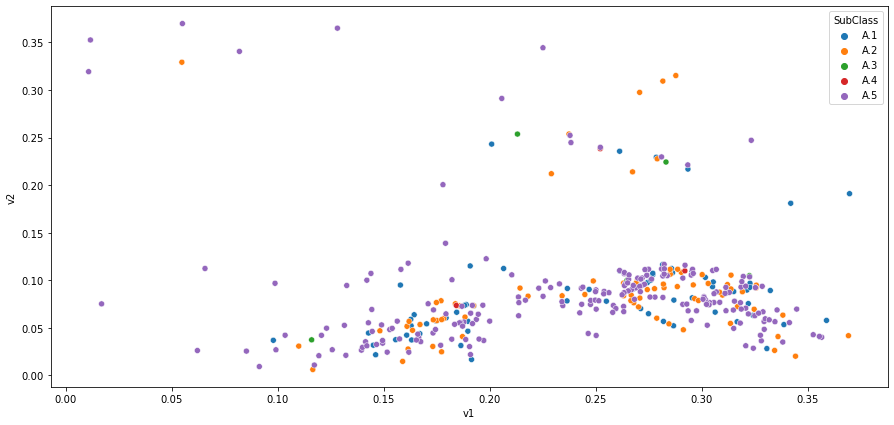

In [145]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='U') & (data['Class'].isin(['0.5']))], hue='SubClass')

Text(0, 0.5, 'v2')

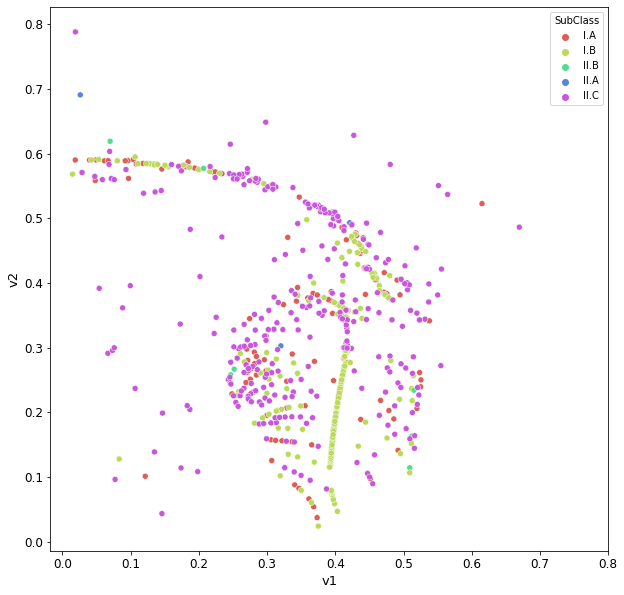

In [146]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'v1', y = 'v2', data = df[df['Class'] =='1.0'], hue='SubClass',  palette='hls')
plt.yticks(np.arange(0,0.81, 0.1), fontsize=12)
plt.xticks(np.arange(0,0.81, 0.1), fontsize=12)
plt.xlabel('v1', fontsize=13)
plt.ylabel('v2', fontsize=13)


## 33 new solutions

In [147]:
new_df = pd.read_csv('33new.csv')

Text(0, 0.5, 'v2')

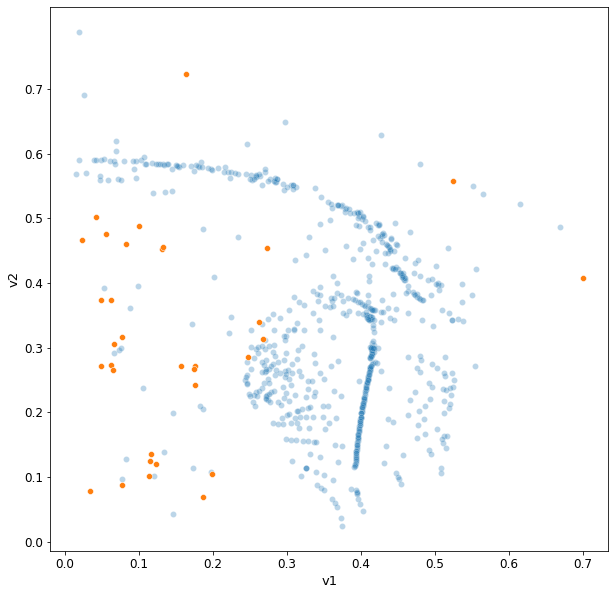

In [148]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'v1', y = 'v2', data = df[(df['Class'] =='1.0') ], alpha=0.3, palette='blue')
sns.scatterplot(x = 'v1', y = 'v2', data = new_df, palette='red')
plt.yticks(np.arange(0,0.71, 0.1), fontsize=12)
plt.xticks(np.arange(0,0.71, 0.1), fontsize=12)
plt.xlabel('v1', fontsize=13)
plt.ylabel('v2', fontsize=13)


<ipython-input-149-c470fc989681>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') &(data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue='Class')#(data['Stability']=='M') &


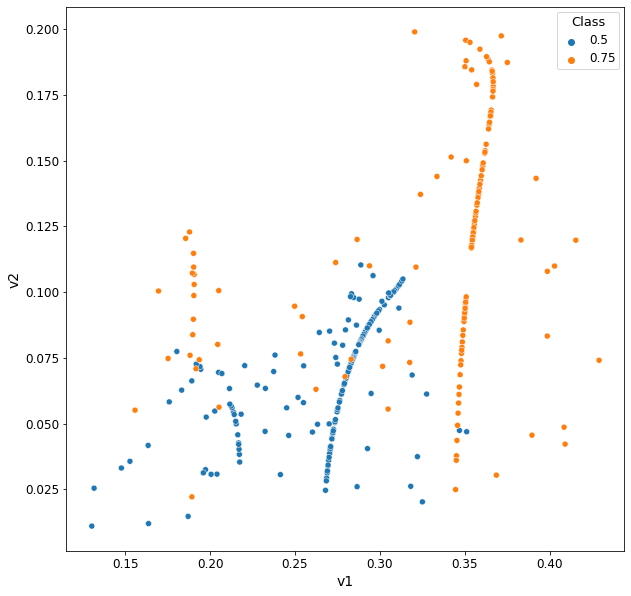

In [149]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') &(data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue='Class')#(data['Stability']=='M') & 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=14)
plt.ylabel('v2', fontsize=14)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

<ipython-input-150-b3576a102e3d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue='Class')#(data['Stability']=='M') &


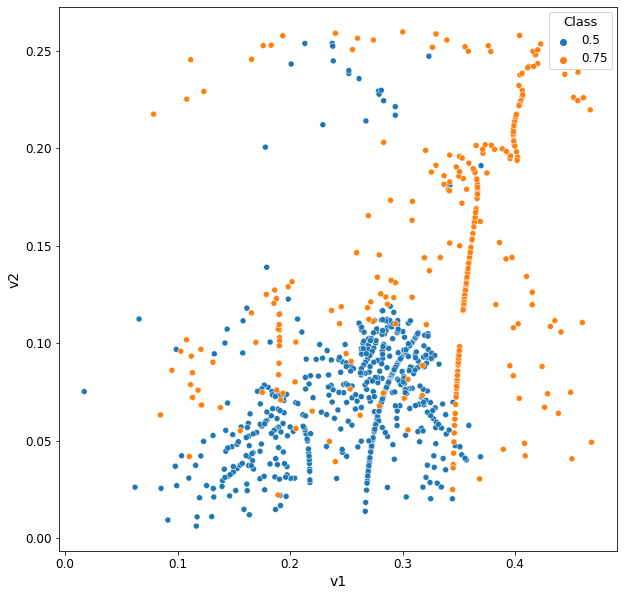

In [150]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue='Class')#(data['Stability']=='M') & 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=14)
plt.ylabel('v2', fontsize=14)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

<ipython-input-214-2f261f6cc5ab>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability'].isin(['M', 'U'])) & (data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue = 'Class', style='Stability', markers=markers,palette='Greys')#palette='Greys'#(data['Stability']=='M') &


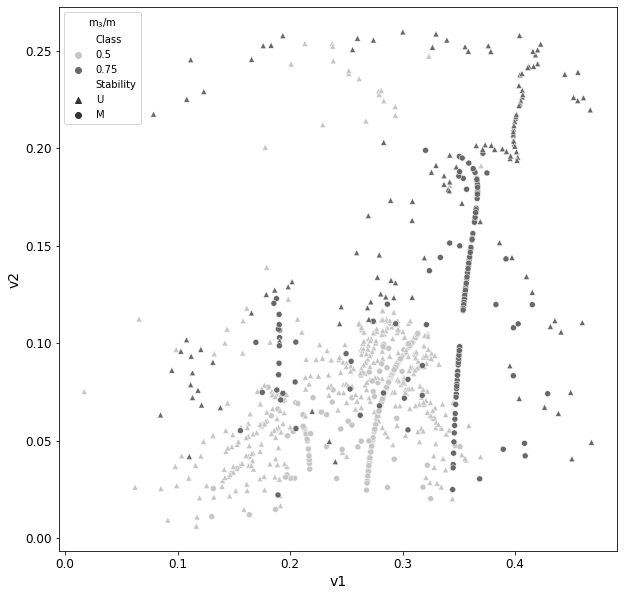

In [214]:
plt.figure(figsize=(10,10))
#plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5','0.75']))], hue='Class')# 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=14)
plt.ylabel('v2', fontsize=14)

#plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
markers = {"M": "o", "U": "^"}
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability'].isin(['M', 'U'])) & (data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue = 'Class', style='Stability', markers=markers,palette='Greys')#palette='Greys'#(data['Stability']=='M') & 
plt.legend(title=r'$\mathrm{m}_{3}/\mathrm{m}$') # for legend title
plt.show()

<ipython-input-213-d96eb20d069c>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability'].isin(['M', 'U'])) & (data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue = 'Class', style='Stability', markers=markers)#palette='Greys'#(data['Stability']=='M') &


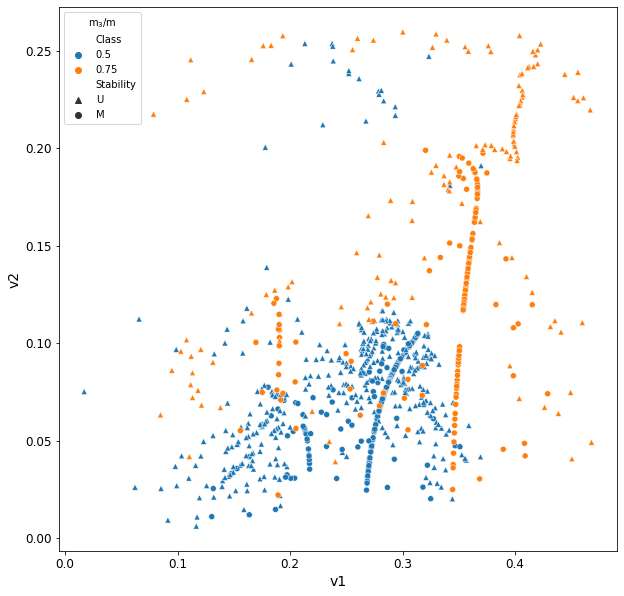

In [213]:
plt.figure(figsize=(10,10))
#plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5','0.75']))], hue='Class')# 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=14)
plt.ylabel('v2', fontsize=14)

#plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
markers = {"M": "o", "U": "^"}
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability'].isin(['M', 'U'])) & (data['Class'].isin(['0.5','0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue = 'Class', style='Stability', markers=markers)#palette='Greys'#(data['Stability']=='M') & 
plt.legend(title=r'$\mathrm{m}_{3}/\mathrm{m}$') # for legend title
plt.show()

In [152]:
df[df['Class']=='1.0']['SubClass'].unique()

array(['I.A', 'I.B', 'II.B', 'II.A', 'II.C'], dtype=object)

Text(0, 0.5, 'v2')

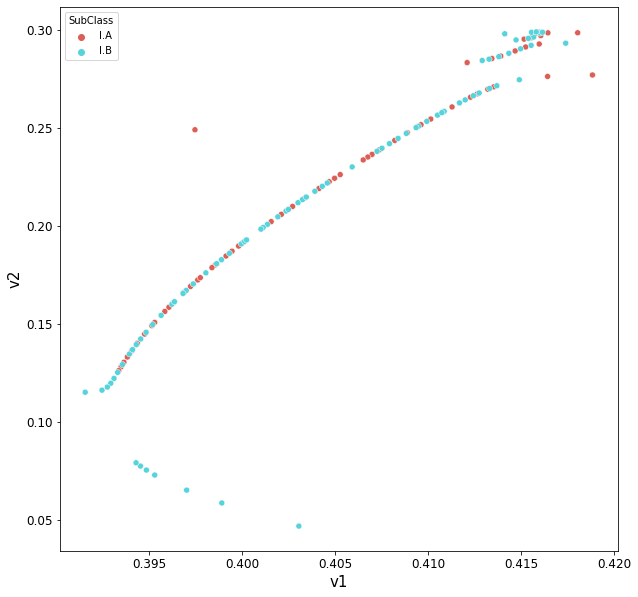

In [153]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'v1', y = 'v2', data = df[(df['SubClass'].isin(['I.B', 'I.A']))  & (df['v1']<0.42) & (df['v1']>0.38) & (df['v2']<0.3) & (df['v1']>0.05)], hue='SubClass',  palette='hls')
sns.scatterplot(x = 'v1', y = 'v2', data = new_df[new_df[(new_df['v1']<0.42) & (new_df['v1']>0.38) & (new_df['v2']<0.3) & (new_df['v1']>0.05)]])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)


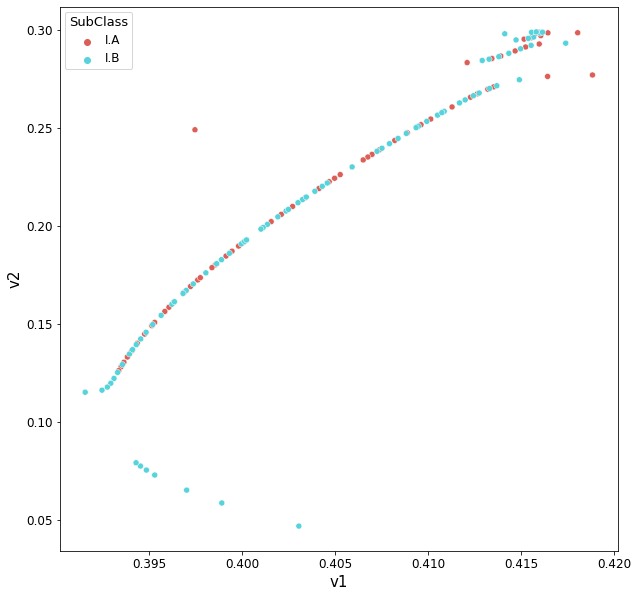

In [154]:
plt.figure(figsize=(10,10))
plot = sns.scatterplot(x = 'v1', y = 'v2', data = df[(df['SubClass'].isin(['I.B', 'I.A']))  & (df['v1']<0.42) & (df['v1']>0.38) & (df['v2']<0.3) & (df['v1']>0.05)], hue='SubClass',  palette='hls')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

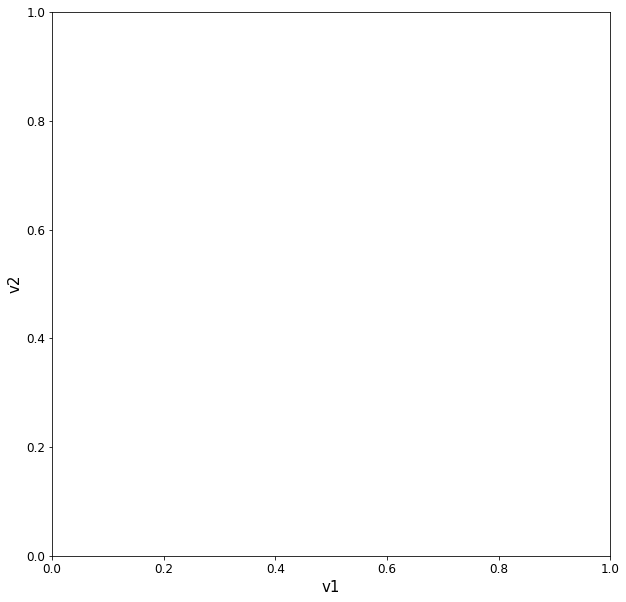

In [155]:
plt.figure(figsize=(10,10))
plot = sns.scatterplot(x = 'v1', y = 'v2', data = df[(df['Stability']=='M') &(df['SubClass'].isin(['I.B', 'I.A']))  & (df['v1']<0.42) & (df['v1']>0.38) & (df['v2']<0.3) & (df['v1']>0.05)], hue='Lf',  palette='hls')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
#plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

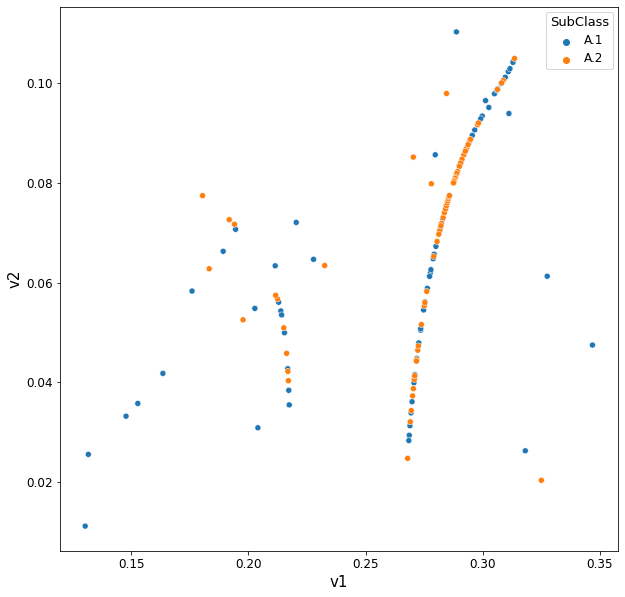

In [156]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1','A.2']))], hue='SubClass')#(data['Stability']=='M') & 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

<ipython-input-157-118d97d45a89>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1','A.2'])) & (df['v1']<0.35) & (df['v2']<0.111)], alpha=0.3, palette='hls')#(data['Stability']=='M') &


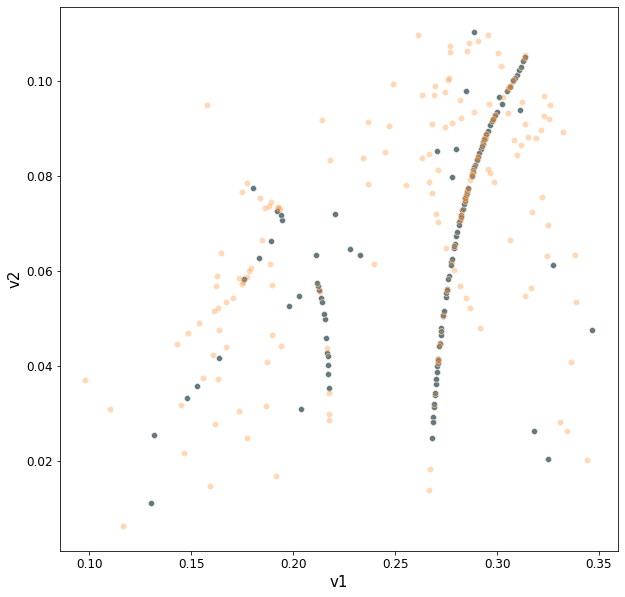

In [157]:
plt.figure(figsize=(10,10))
plot = sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1','A.2']))], palette='hls') 
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1','A.2'])) & (df['v1']<0.35) & (df['v2']<0.111)], alpha=0.3, palette='hls')#(data['Stability']=='M') & 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)

plt.show()

<ipython-input-158-24583817b0b1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1','A.2'])) & (df['v1']<0.35) & (df['v2']<0.111)], hue='SubClass')#(data['Stability']=='M') &


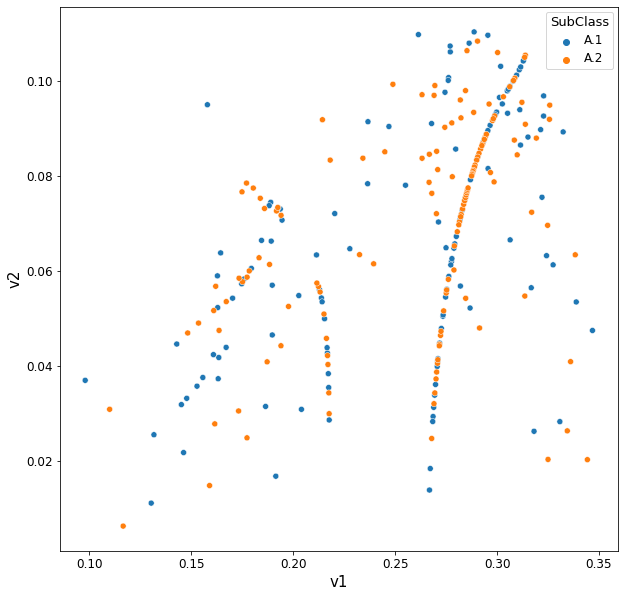

In [158]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1','A.2'])) & (df['v1']<0.35) & (df['v2']<0.111)], hue='SubClass')#(data['Stability']=='M') & 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

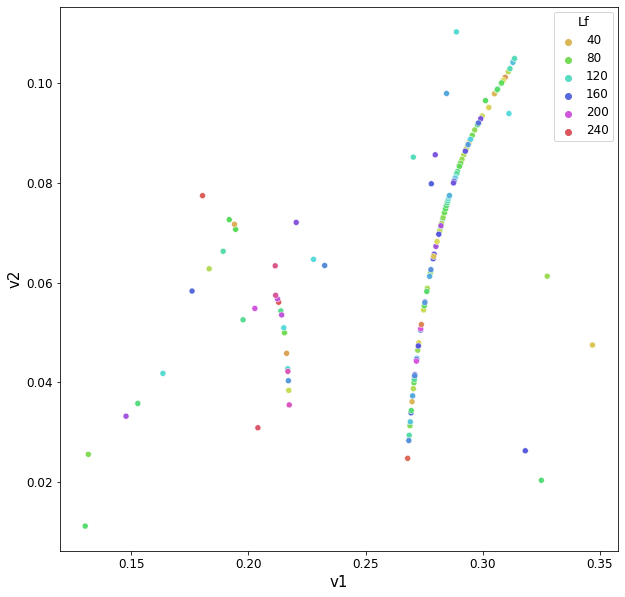

In [159]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5'])) & (data['SubClass'].isin(['A.1','A.2']))], hue='Lf', palette='hls')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

In [160]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5']))]& (data['SubClass'].isin(['A.1','A.2']))], hue='Lf', palette='hls')# 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=14)
plt.ylabel('v2', fontsize=14)
#plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.5'])) & (df['v1']<0.37) & (df['v2']<0.15)], hue = 'Lf', alpha=0.15)#(data['Stability']=='M') & 
plt.show()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-160-0b264dca010a>, line 2)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') &(data['Class'].isin(['0.75'])) ], hue='SubClass')#(data['Stability']=='M') & 

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') &(data['Class'].isin(['0.75'])) ])#(data['Stability']=='M') & 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], alpha = 0.3)

plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Class'].isin(['0.75'])) & (df['v1']<0.47) & (df['v2']<0.26)], hue='SubClass')#(data['Stability']=='M') & 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plot =  sns.scatterplot(x = 'v1', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.75'])) ], hue='Lf',palette='hls')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

In [ ]:
df

In [ ]:
plt.figure(figsize=(15,7))
plot =  sns.scatterplot(x = 'T', y = 'v2', data = data[(data['Class'].isin(['0.75']))& (data['v2']<0.26) ], palette='gray_r', alpha=0.4, label='Not stable')
sns.scatterplot(x = 'T', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.75'])) ], palette='Reds',  label='Marginally stable')
#(data['Stability']=='M') & 
plt.xlabel('v1', fontsize=15)
plt.ylabel('v2', fontsize=15)
plt.xlabel('T', fontsize=14)
plt.ylabel('v2', fontsize=14)
#plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plot =  sns.scatterplot(x = 'T', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.75'])) ], hue='Lf',  palette='hls')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('T', fontsize=14)
plt.ylabel('v2', fontsize=14)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plot =  sns.scatterplot(x = 'T', y = 'v2', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.5'])) ], hue='T*',  palette='hls')
sns.scatterplot(x = 'T', y = 'v2', data = data[(data['Class'].isin(['0.5'])) ], hue='T*',  palette='hls', alpha = 0.3)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('T', fontsize=14)
plt.ylabel('v2', fontsize=14)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plot =  sns.scatterplot(x = 'T', y = 'v1', data = data[(data['Stability']=='M') & (data['Class'].isin(['0.75','0.5'])) ], hue='Class',  palette='hls')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('T', fontsize=14)
plt.ylabel('v1', fontsize=14)
plt.setp(plot.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='13') # for legend title
plt.show()